In [2]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pyfits
# There has gotta be a faster way to just reload a couple of galaxies
# This will yield a tuple for each subdirectory. Ths first entry in the 3-tuple is a directory name, so:
print(os.getcwd())
plates = os.listdir('/Users/rebeccanevin/Documents/Kinematic_ML/kin_maps/')
#plates_e = os.listdir('/Users/beckynevin/CfA_Code/Kinematic_ML/kin_maps_e/')

#[x[0] for x in os.walk('/Users/beckynevin/CfA_Code/Kinematic_ML/kin_maps/')]
print('plates',len(plates))



# import test to get shape
im = pyfits.open('/Users/rebeccanevin/Documents/Kinematic_ML/kin_maps/'+str(plates[0]))[1].data
plt.clf()
plt.imshow(im, cmap='RdBu_r')
plt.colorbar()
plt.show()

shape = np.shape(im)[0]
map_array_ml = np.zeros((len(plates),shape**2))#np.zeros((len(plateifu_list),74**2))
map_array_ml_e = np.zeros((len(plates),shape**2))#np.zeros((len(plateifu_list),74**2))

ifu_name=[]

counter=0


r_eff_list=[]

for j in range(len(plates)):
    #initial_split = str((re.split('_',plates[j]))[2])
    ifu_1 = re.split('-',(plates[j]))[0]
    ifu_1_2 = re.split('-',(plates[j]))[1]
    
    #ifu_2_split = re.split('-',(initial_split))[1]
    ifu_2 = re.split('.f',(ifu_1_2))[0]
    ifu_name.append(str(ifu_1)+'-'+str(ifu_2))
    
    mapit = pyfits.open('/Users/rebeccanevin/Documents/Kinematic_ML/kin_maps/'+str(plates[j]))[1].data
    map_array_ml[j,:] = np.reshape(mapit,(shape**2))
    
    mapit_e = pyfits.open('/Users/rebeccanevin/Documents/Kinematic_ML/kin_maps_e/'+str(plates[j]))[1].data
    map_array_ml_e[j,:] = np.reshape(mapit_e,(shape**2))
    
    r_eff_list.append(2*float(pyfits.open('/Users/rebeccanevin/Documents/Kinematic_ML/kin_maps/'+str(plates[j]))[0].header['REFF']))
    #existing_plateifus.append(str(re.split('/',plates[j])[-2])+'-'+str(re.split('/',plates[j])[-1]))
print(ifu_name)

/Users/rebeccanevin/Documents/Kinematic_ML
plates 402


/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


<Figure size 640x480 with 2 Axes>

['8997-12702', '9186-12705', '8341-12703', '7962-12701', '8985-12701', '8946-12703', '8722-12704', '10496-3701', '9000-12703', '8250-12702', '9869-12705', '8999-12701', '8949-12705', '8078-12702', '9496-12703', '8651-12705', '8603-9102', '8243-12704', '8948-9101', '8079-6101', '9001-6104', '8977-6103', '8145-3704', '8084-12701', '8243-9102', '8977-12701', '10511-12704', '8940-12701', '9504-12704', '7990-12701', '9186-9102', '7964-12703', '8723-6104', '8462-12702', '8455-12702', '8941-12704', '10510-12701', '8312-12701', '7991-12704', '9194-3703', '8145-12704', '8462-1902', '8979-6101', '8603-12702', '8439-12701', '10496-9101', '9031-12701', '8611-12701', '8144-12701', '8626-12701', '8143-1902', '8588-3704', '8449-12703', '8603-12703', '10001-12703', '8313-6102', '8145-12705', '8143-3704', '8979-12703', '8462-12703', '8258-12702', '7964-12702', '9504-12705', '8454-1901', '9504-3702', '8324-12705', '8604-1902', '8948-12701', '8714-1902', '8315-6103', '10519-12704', '8274-12705', '9496-12

(402, 5776)


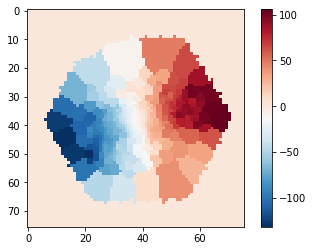

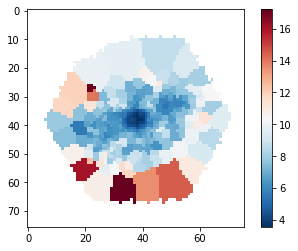

402


In [3]:
# To prepare the map cube (map_array_ml) for ML algorithms,
# it is necessary to first cut off all the empty rows.

# Removing all rows that were not filled (above)
data = map_array_ml[~np.all(map_array_ml == 0, axis=1)]
data_e = map_array_ml_e[~np.all(map_array_ml_e == 0, axis=1)]
print(np.shape(data))
plt.imshow(np.reshape(data[6], (76,76)), cmap='RdBu_r')
plt.colorbar()
plt.show()

plt.imshow(np.reshape(data_e[6], (76,76)), cmap='RdBu_r')
plt.colorbar()
plt.show()
data_length = np.shape(data)[0]
map_array_ml = data

size = int(np.sqrt(np.shape(map_array_ml[0])[0]))
#map_array_ml = np.ma.masked_where(data==0., data)
print(len(r_eff_list))



In [4]:
import matplotlib
class MidpointNormalize(matplotlib.colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))
    #elev_min=-150
    #elev_max=3000
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

def minimize_left_right(vel, vel_e, verbose):
    # This is a different way to rotate, where I sum up the left and right side sum, 
    # but it needs to 1) only count once for binned data and 2) take the error into account possibly
    
    
    
    if verbose=='yes':
        plt.imshow(vel)
        plt.colorbar()
        plt.show()
        plt.imshow(vel_e)
        plt.colorbar()
        plt.show()

    # First to delete all repeat indices use this:
    
    # To do this put into list form
    vel_list = list(np.reshape(vel, np.shape(vel)[0]**2))
    vel_list_e = list(np.reshape(vel_e, np.shape(vel_e)[0]**2))
    indices=[] # Your output list  
    
    for elem in set(vel_list):
        indices.append(vel_list.index(elem))
    
    vel_norep=[]
    vel_e_norep=[]
    index=0
    for j in vel_list:
        if j == 0.0:
            vel_norep.append(0.0)
            vel_e_norep.append(0.0)
            index +=1
            continue
        #print('this is the velocity associated with that', j)
        
        #if vel_list.index(elem) exists in the index list then keep it the same, otherwise make it into a zero
        counter=0
        if index in indices:
            vel_norep.append(j)
            vel_e_norep.append(vel_list_e[index])
            index +=1
        else:
            vel_norep.append(0.0)
            vel_e_norep.append(0.0)
            index +=1
       
                
        
                
        
    vel_norep = np.reshape(vel_norep, (np.shape(vel)[0], np.shape(vel)[0]))
    vel_e_norep = np.reshape(vel_e_norep, (np.shape(vel)[0], np.shape(vel)[0]))
    plt.clf()
    fig = plt.figure()
    ax0 = fig.add_subplot(121)
    im0 = ax0.imshow(vel_norep, cmap='RdBu_r')
    plt.colorbar(im0)
    
    ax1 = fig.add_subplot(122)
    im1 = ax1.imshow(vel_e_norep)
    plt.colorbar(im1)
    plt.show()
  
    
    shift_y, shift_x = np.array(tester_gal.shape[:2]) / 2.
    
    
    
    tf_shift = transform.SimilarityTransform(translation=[-shift_x, -shift_y])
    tf_shift_inv = transform.SimilarityTransform(translation=[shift_x, shift_y])

    
    testing=np.linspace(0,360, 60)
    
    total_sum=[]
    
    for j in range(len(testing)):
        tf_rotate = transform.SimilarityTransform(rotation=np.deg2rad(testing[j]))
        rot = transform.warp(vel_norep, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)
        rot = np.ma.masked_where(rot==0, rot)
        if verbose=='yes':
            plt.clf()
            plt.imshow(rot, cmap='RdBu_r')
            plt.colorbar()
            plt.title('Rotated = '+str(testing[j]))
        
        
        left_sum = np.sum(rot[:,0:int(np.shape(rot)[0]/2)])
        right_sum = np.sum(rot[:,int(np.shape(rot)[0]/2):])
        total_sum.append(right_sum-left_sum)
        if verbose=='yes':
            plt.annotate('Sum = '+str(round(right_sum-left_sum, 1)), xy=(0.1,0.1), xycoords='axes fraction')
            plt.show()
    import operator
    index, value = max(enumerate(total_sum), key=operator.itemgetter(1))
    if verbose=='yes':
        print('index, value', index, value)  
        print('minimized at this rot ', testing[index])
    
    tf_rotate = transform.SimilarityTransform(rotation=np.deg2rad(testing[index]))
    rot = transform.warp(vel_norep, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)
    rot = np.ma.masked_where(rot==0, rot)
    rot_e = transform.warp(vel_e_norep, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)
    rot_e = np.ma.masked_where(rot_e==0, rot_e)
    rot_vor = transform.warp(vel, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)
    rot_vor = np.ma.masked_where(rot_vor==0, rot_vor)
    return testing[index], rot, rot_vor, rot_e, value
print('Compiled and ready to run')

Compiled and ready to run


/Users/rebeccanevin/Documents/Kinematic_ML
(402, 5776)
402
o 0


<Figure size 432x288 with 0 Axes>

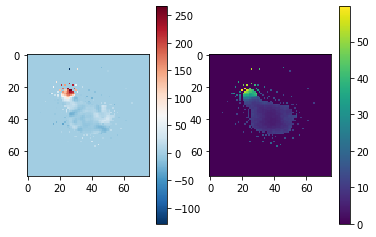

<Figure size 432x288 with 0 Axes>

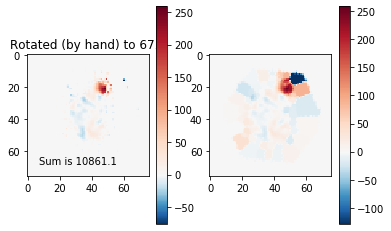

o 1


<Figure size 432x288 with 0 Axes>

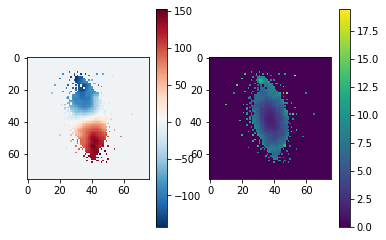

<Figure size 432x288 with 0 Axes>

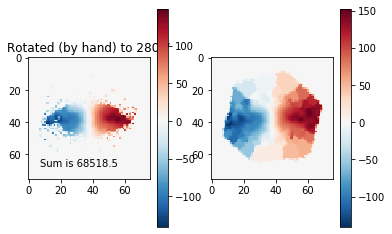

o 2


<Figure size 432x288 with 0 Axes>

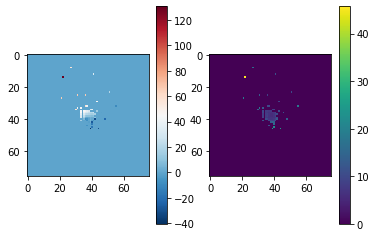

<Figure size 432x288 with 0 Axes>

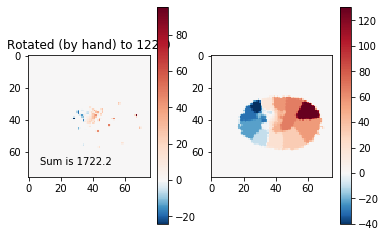

o 3


<Figure size 432x288 with 0 Axes>

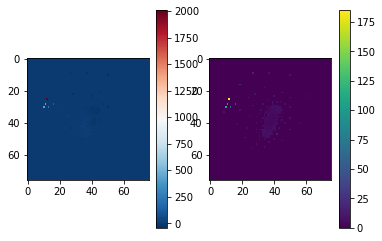

<Figure size 432x288 with 0 Axes>

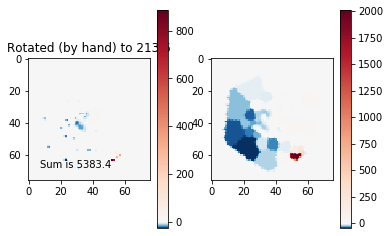

o 4


<Figure size 432x288 with 0 Axes>

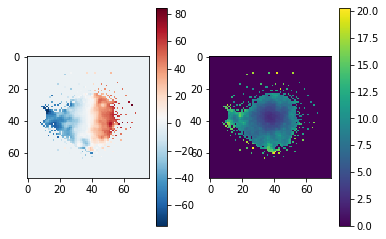

<Figure size 432x288 with 0 Axes>

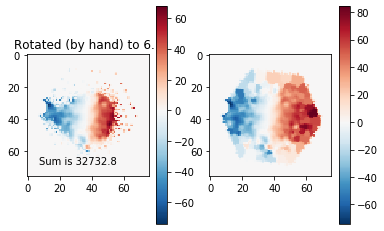

o 5


<Figure size 432x288 with 0 Axes>

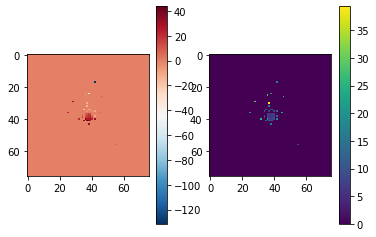

<Figure size 432x288 with 0 Axes>

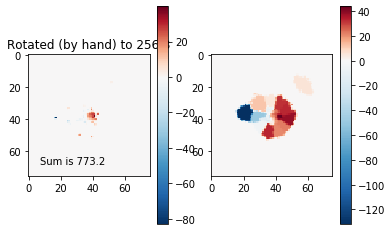

o 6


<Figure size 432x288 with 0 Axes>

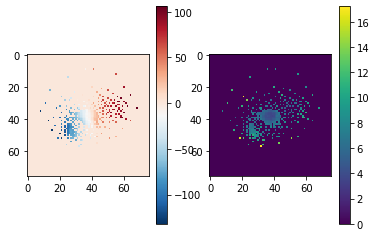

<Figure size 432x288 with 0 Axes>

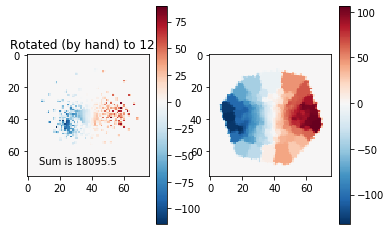

o 7


<Figure size 432x288 with 0 Axes>

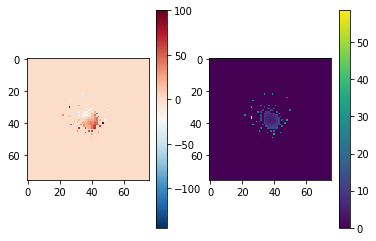

<Figure size 432x288 with 0 Axes>

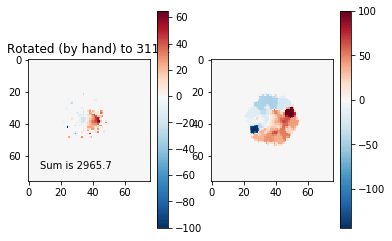

o 8


<Figure size 432x288 with 0 Axes>

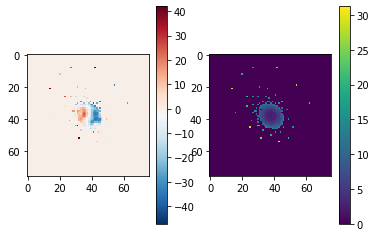

<Figure size 432x288 with 0 Axes>

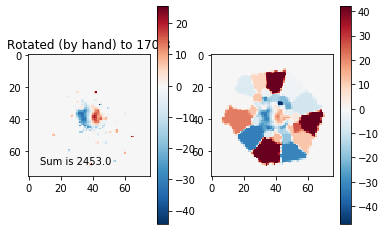

o 9


<Figure size 432x288 with 0 Axes>

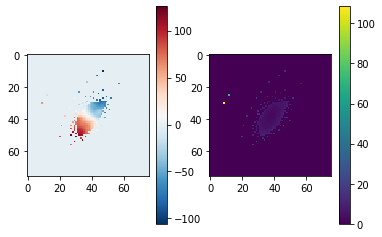

<Figure size 432x288 with 0 Axes>

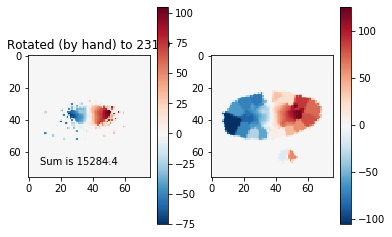

o 10


<Figure size 432x288 with 0 Axes>

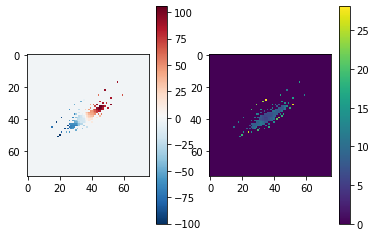

<Figure size 432x288 with 0 Axes>

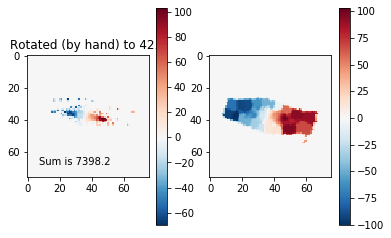

o 11


<Figure size 432x288 with 0 Axes>

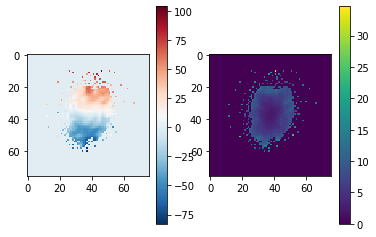

<Figure size 432x288 with 0 Axes>

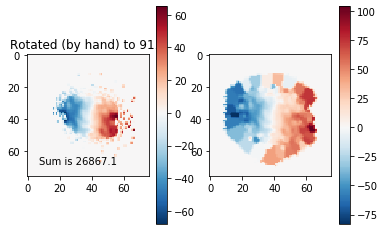

o 12


<Figure size 432x288 with 0 Axes>

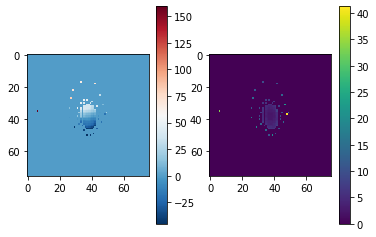

<Figure size 432x288 with 0 Axes>

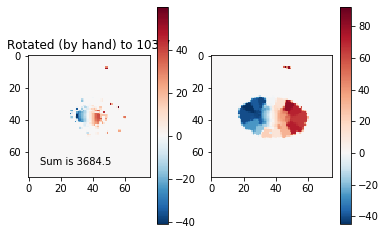

o 13


<Figure size 432x288 with 0 Axes>

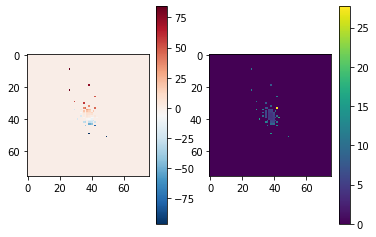

<Figure size 432x288 with 0 Axes>

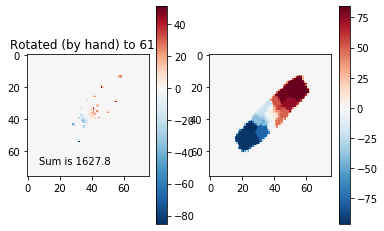

o 14


<Figure size 432x288 with 0 Axes>

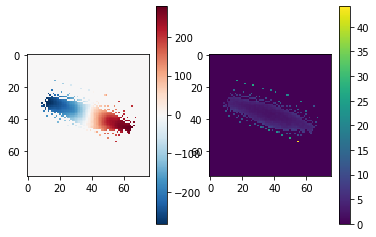

<Figure size 432x288 with 0 Axes>

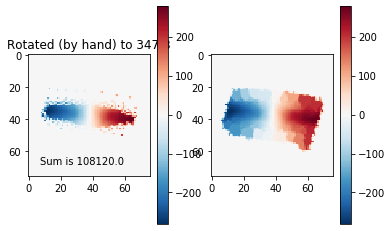

o 15


<Figure size 432x288 with 0 Axes>

In [ ]:
data_ml = map_array_ml[~np.all(map_array_ml == 0, axis=1)]
data_ml_e = map_array_ml_e[~np.all(map_array_ml_e == 0, axis=1)]

import matplotlib
import os

from skimage import transform
from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
print(os.getcwd() )
#import radon_python_mod.radon
from radon_python_mod_troubleshoot import * # instead of using the below version
print(np.shape(data_ml))

def find_nearest_idx(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

print(len(r_eff_list))


verbose='no'

data_ml_rot = np.zeros((150, 76, 76))#len(r_eff_list)
data_ml_rot_vor = np.zeros((150, 76, 76))#len(r_eff_list)

data_ml_rot_e = np.zeros((150, 76, 76))#len(r_eff_list)

rotate_PA=[]
rotate_PA_e=[]
rotate_ifu=[]
for o in range(150):#len(r_eff_list)):
    print('o', o)
    #o=11+o# I think 3 and 11 also has problems
    #o=49
    tester_gal = np.reshape(data_ml[o,:], (76,76))
    tester_gal_e = np.reshape(data_ml_e[o,:], (76,76))
    
    
    
    # Write a little sub routine where you basically minimize the left and right sum
    PA_kin_by_hand, rotated_by_hand, rotated_by_hand_vor, rotated_by_hand_e, sum_by_hand = minimize_left_right(tester_gal, tester_gal_e, 'no')
    plt.clf()
    fig=plt.figure()
    ax0 = fig.add_subplot(121)
    im0 = ax0.imshow(rotated_by_hand, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0))
    plt.colorbar(im0)
    ax0.set_title('Rotated (by hand) to '+str(round(PA_kin_by_hand,1)))
    try:
        ax0.annotate('Sum is '+str(round(sum_by_hand,1)), xy=(0.1,0.1), xycoords='axes fraction')
    except:
        
        continue
    ax1 = fig.add_subplot(122)
    im1 = ax1.imshow(rotated_by_hand_vor, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0))
    plt.colorbar(im1)
    plt.show()
    
    
    data_ml_rot[o,:,:] = rotated_by_hand
    data_ml_rot_vor[o,:,:] = rotated_by_hand_vor
    data_ml_rot_e[o,:,:] = rotated_by_hand_e
    rotate_PA.append(PA_kin_by_hand)
    #rotate_PA_e.append(std_avg)
    rotate_ifu.append(ifu_name[o])
    continue
    
    
    
    
    
    
    
    
    
    
    
    
    
    if verbose=='yes':
        plt.clf()
        plt.imshow(tester_gal, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0))
        plt.colorbar()
        plt.annotate('R$_e$ = '+str(round(r_eff_list[o],1)), xy=(0.1,0.1), xycoords='axes fraction')
        # Draw a line to respresent the effective radius:
        xs = [np.shape(tester_gal)[0]/2, np.shape(tester_gal)[0]/2+1*r_eff_list[o]]
        ys = [np.shape(tester_gal)[0]/2, np.shape(tester_gal)[0]/2]
        plt.plot(xs, ys, color='black')
        plt.scatter(np.shape(tester_gal)[0]/2, np.shape(tester_gal)[0]/2, color='red', marker='x')
        plt.title(str(ifu_name[o]))
        plt.show()

        plt.clf()
        plt.imshow(tester_gal_e)
        plt.colorbar()
        plt.title('Error Image')
        plt.show()
    
    
    rad = radon(tester_gal,tester_gal_e, 15, 15,r_eff_list[o],  1, verbose)
    
    try:
        if rad[8]==1:
        # Run it again expanded
            rad = radon(tester_gal, tester_gal_e, 15, 15, r_eff_list[o],  2, verbose)
    except ValueError:
        #continuing, it worked
        print('Okay with initial smaller box')
    
    masked_thetahat = ma.masked_where(rad[6]==0, rad[6])
    
    
    if verbose=='yes':
        plt.clf()
        fig=plt.figure(figsize=(20,20))

        ax = fig.add_subplot(221)
        ax.set_title('R$_{AB}$ Smoothed')
        im = ax.imshow(rad[1],norm=matplotlib.colors.LogNorm())
        plt.colorbar(im, fraction=0.046, pad=0.04)
        xs = ax.get_xticks()
        ys = ax.get_yticks()
        
        
        
        x_labels = [rad[5][0], (rad[5][-1]-rad[5][0])/2, rad[5][-1]]
        y_labels = [rad[4][0], 0, rad[4][-1]]

        xs_locs = [xs[1], (xs[-1]-xs[1])/2, xs[-1]]
        ys_locs = [ys[1], (ys[-1]-ys[1])/2, ys[-1]]


        ax.set_xticks(xs_locs)
        ax.set_yticks(ys_locs)
        ax.set_xticklabels(x_labels)
        ax.set_yticklabels(y_labels)




        ax1 = fig.add_subplot(222)
        ax1.set_title('R$_{AB}$ Error Smoothed')
        im1 = ax1.imshow(rad[9],norm=matplotlib.colors.LogNorm())
        plt.colorbar(im1, fraction=0.046, pad=0.04)


        ax1.set_xticks(xs_locs)
        ax1.set_yticks(ys_locs)
        ax1.set_xticklabels(x_labels)
        ax1.set_yticklabels(y_labels)


        ax2 = fig.add_subplot(223)
        ax2.set_title('R$_{AB}$ + Error')
        im2 = ax2.imshow(rad[9]+rad[1],norm=matplotlib.colors.LogNorm())
        plt.colorbar(im2, fraction=0.046, pad=0.04)

        ax2.set_xticks(xs_locs)
        ax2.set_yticks(ys_locs)
        ax2.set_xticklabels(x_labels)
        ax2.set_yticklabels(y_labels)

        ax3 = fig.add_subplot(224)
        ax3.set_title('Percent Error')
        im3 = ax3.imshow(abs(rad[9]/rad[1]),norm=matplotlib.colors.LogNorm())
        plt.colorbar(im3, fraction=0.046, pad=0.04)
    
        ax3.set_xticks(xs_locs)
        ax3.set_yticks(ys_locs)
        ax3.set_xticklabels(x_labels)
        ax3.set_yticklabels(y_labels)


        plt.tight_layout()
        plt.show()
    
    
    
    PA_kin = np.mean(masked_thetahat)
    if verbose=='yes':
        plt.clf()
        plt.scatter(rad[4], masked_thetahat)
        plt.errorbar(rad[4], masked_thetahat, yerr=rad[7])
        plt.axhline(y=np.mean(masked_thetahat))
    
        print('PA kin', PA_kin)
        plt.xlabel('p list')
        plt.ylabel('$\hat{\Theta}$')
        plt.ylim([-180,180])
        plt.show()
    
    


    # There is this problem where if theta hat is greater than 90 the
    # the average is messed up because of the wrap
    new_thetahat=[]
    for j in range(len(masked_thetahat)):
        if rad[6][j]>90 and (rad[6][j+1]-rad[6][j])>10 and (rad[6][j-1]-rad[6][j])>10:
            
            new_thetahat.append(masked_thetahat[j]-180)
        else:

            new_thetahat.append(masked_thetahat[j])
    masked_new_thetahat = ma.masked_where(np.isnan(new_thetahat), new_thetahat)
    
       
    real_thetahat=[]
    real_thetahat_e = []
    for g in range(len(masked_new_thetahat)):
        if rad[7][g]==0 or np.isnan(rad[7][g]):
            continue
        else:
            real_thetahat.append(masked_new_thetahat[g])
            real_thetahat_e.append(rad[7][g])
    
    try:
        avg, std_avg = weighted_avg_and_std(np.array(real_thetahat), 1/np.array(real_thetahat_e))
        #print('weighting', np.array(real_thetahat_e)**2)
        #avg, std_avg = weighted_avg_and_std(np.array(real_thetahat), np.array(real_thetahat_e)**2)
    except:
        STOP
        # Sometimes there's a normalization error as in the weights sum to zero
        avg = np.mean(real_thetahat)
        std_avg = 0
    
    if verbose=='yes':
        plt.clf()
        plt.scatter(rad[4], masked_new_thetahat)
        plt.errorbar(rad[4], masked_new_thetahat, yerr=rad[7])
        plt.axhline(y=avg)
        print(real_thetahat, real_thetahat_e)
        print('PA kin weighted', avg, std_avg)
        plt.xlabel('p list')
        plt.ylabel('$\hat{\Theta}$')
        plt.ylim([-180,180])
        plt.show()

    PA_kin = avg#np.mean(masked_new_thetahat)
    if PA_kin < 0:
        PA_kin = PA_kin+180
    
    size = np.shape(tester_gal)[0]
    x=np.linspace(0, np.shape(tester_gal)[0], 100)
    ys_kin=[(j-size/2)/math.tan(math.radians(PA_kin))+size/2 for j in x]


    

    

    shift_y, shift_x = np.array(tester_gal.shape[:2]) / 2.
    tf_rotate = transform.SimilarityTransform(rotation=np.deg2rad(PA_kin))
    tf_shift = transform.SimilarityTransform(translation=[-shift_x, -shift_y])
    tf_shift_inv = transform.SimilarityTransform(translation=[shift_x, shift_y])

    rot = transform.warp(tester_gal, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)
    rot = np.ma.masked_where(rot==0, rot)

    # The first step is to calculate hte left and right sum of the tester galaxy
    left_sum = np.sum(tester_gal[:,0:int(np.shape(tester_gal)[0]/2)])
    right_sum = np.sum(tester_gal[:,int(np.shape(tester_gal)[0]/2):])
    if right_sum < 0 and left_sum > 0:
        #then rotate around 180 fliplr
        rot_tester= np.fliplr(tester_gal)
        PA_kin+=180
        left_sum = np.sum(rot_tester[:,0:int(np.shape(rot_tester)[0]/2)])
        right_sum = np.sum(rot_tester[:,int(np.shape(rot_tester)[0]/2):])
    else:
        rot_tester = tester_gal
    print('left and right sum of the original', left_sum, right_sum)
    option_tester = right_sum-left_sum
    
    # Check to see if blue is on the left:
    left_sum = np.sum(rot[:,0:int(np.shape(rot)[0]/2)])
    right_sum = np.sum(rot[:,int(np.shape(rot)[0]/2):])
    if right_sum < 0 and left_sum > 0:
        #then rotate around 180 fliplr
        rot= np.fliplr(rot)
        PA_kin+=180
        left_sum = np.sum(rot[:,0:int(np.shape(rot)[0]/2)])
        right_sum = np.sum(rot[:,int(np.shape(rot)[0]/2):])
    if verbose=='yes':
        plt.clf()
        fig = plt.figure()
        ax0 = fig.add_subplot(121)
        ax0.imshow(tester_gal, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0))
        ax1 = fig.add_subplot(122)
        ax1.imshow(rot, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0))
        #plt.plot(x, ys_kin, color='red')
        ax1.axvline(x=size/2, color='red')
        ax1.set_title('Rotated '+str(ifu_name[o])+' '+str(o))
        plt.show()

        print('left sum', left_sum, 'right_sum', right_sum, right_sum-left_sum)
    option_1 = right_sum-left_sum
    rot_1 = rot
    PA_kin_1 = PA_kin
    std_avg_1 = std_avg
    
    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    # Now try to set it up the other way
    
    # There is this problem where if theta hat is greater than 90 the
    # the average is messed up because of the wrap
    new_thetahat=[]
    for j in range(len(masked_thetahat)):
        if rad[6][j]>90:
            
            new_thetahat.append(masked_thetahat[j]-180)
        else:

            new_thetahat.append(masked_thetahat[j])
    masked_new_thetahat = ma.masked_where(np.isnan(new_thetahat), new_thetahat)
    
    real_thetahat=[]
    real_thetahat_e = []
    for g in range(len(masked_new_thetahat)):
        if rad[7][g]==0 or np.isnan(rad[7][g]):
            continue
        else:
            real_thetahat.append(masked_new_thetahat[g])
            real_thetahat_e.append(rad[7][g])
    
    try:
        avg, std_avg = weighted_avg_and_std(np.array(real_thetahat), 1/np.array(real_thetahat_e))
        #print('weighting', np.array(real_thetahat_e)**2)
        #avg, std_avg = weighted_avg_and_std(np.array(real_thetahat), np.array(real_thetahat_e)**2)
    except:
        STOP
        # Sometimes there's a normalization error as in the weights sum to zero
        avg = np.mean(real_thetahat)
        std_avg = 0
    
    if verbose=='yes':
        plt.clf()
        plt.scatter(rad[4], masked_new_thetahat)
        plt.errorbar(rad[4], masked_new_thetahat, yerr=rad[7])
    
        plt.axhline(y=avg)
        print(real_thetahat, real_thetahat_e)
        print('PA kin weighted', avg, std_avg)
        plt.xlabel('p list')
        plt.ylabel('$\hat{\Theta}$')
        plt.ylim([-180,180])
        plt.show()

    PA_kin = avg#np.mean(masked_new_thetahat)
    if PA_kin < 0:
        PA_kin = PA_kin+180
    
    size = np.shape(tester_gal)[0]
    x=np.linspace(0, np.shape(tester_gal)[0], 100)
    ys_kin=[(j-size/2)/math.tan(math.radians(PA_kin))+size/2 for j in x]


    

    

    shift_y, shift_x = np.array(tester_gal.shape[:2]) / 2.
    tf_rotate = transform.SimilarityTransform(rotation=np.deg2rad(PA_kin))
    tf_shift = transform.SimilarityTransform(translation=[-shift_x, -shift_y])
    tf_shift_inv = transform.SimilarityTransform(translation=[shift_x, shift_y])

    rot = transform.warp(tester_gal, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)
    rot = np.ma.masked_where(rot==0, rot)



    
    
    # Check to see if blue is on the left:
    left_sum = np.sum(rot[:,0:int(np.shape(rot)[0]/2)])
    right_sum = np.sum(rot[:,int(np.shape(rot)[0]/2):])
    if right_sum < 0 and left_sum > 0:
        #then rotate around 180 fliplr
        rot= np.fliplr(rot)
        PA_kin+=180
        left_sum = np.sum(rot[:,0:int(np.shape(rot)[0]/2)])
        right_sum = np.sum(rot[:,int(np.shape(rot)[0]/2):])
    if verbose=='yes':
        plt.clf()
        fig = plt.figure()
        ax0 = fig.add_subplot(121)
        ax0.imshow(tester_gal, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0))
        ax1 = fig.add_subplot(122)
        ax1.imshow(rot, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0))
        #plt.plot(x, ys_kin, color='red')
        ax1.axvline(x=size/2, color='red')
        ax1.set_title('Rotated '+str(ifu_name[o])+' '+str(o))
        plt.show()


        print('left sum', left_sum, 'right sum', right_sum, right_sum-left_sum)
    
    
    
    option_2 = right_sum-left_sum
    rot_2 = rot
    PA_kin_2 = PA_kin
    std_avg_2 = std_avg
    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    if option_1 > option_2:
        # Then the first way is the better way of finding the kinematic PA:
        rot = rot_1
        PA_kin = PA_kin_1
        std_avg = std_avg_1
        #print('max sum is', option_1, ' should be greater than tester sum', option_tester)
    else:
        rot = rot_2
        PA_kin = PA_kin_2
        std_avg = std_avg_2
        #print('max sum is', option_2, ' should be greater than tester sum', option_tester)
    
    fig = plt.figure()
    ax0 = fig.add_subplot(121)
    ax0.imshow(rot_tester, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0))
    ax1 = fig.add_subplot(122)
    ax1.imshow(rot, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0))
    #plt.plot(x, ys_kin, color='red')
    ax1.axvline(x=size/2, color='red')
    ax1.set_title('Rotated '+str(ifu_name[o])+' '+str(o))
    
    xs = [np.shape(tester_gal)[0]/2, np.shape(tester_gal)[0]/2+1*r_eff_list[o]]
    ys = [np.shape(tester_gal)[0]/2, np.shape(tester_gal)[0]/2]
    ax1.plot(xs, ys, color='black')
    plt.show()
    
    
    #PA_kin_by_hand, rotated_by_hand, sum_by_hand
    if sum_by_hand > option_1 and sum_by_hand > option_2:
        # Then rotate to my rough rotation
        data_ml_rot[o,:,:] = rotated_by_hand
        rotate_PA.append(PA_kin_by_hand)
        rotate_PA_e.append(0)
        rotate_ifu.append(ifu_name[o])
        print('~~~~ BY HAND WINS ~~~~~')
    else:
        data_ml_rot[o,:,:] = rot 
    
        rotate_PA.append(PA_kin)
        rotate_PA_e.append(std_avg)
        rotate_ifu.append(ifu_name[o])
    
    
    

In [ ]:
print(np.shape(data_ml_rot))
print(np.shape(rotate_ifu))

'''data_ml_rot[o,:,:] = rotated_by_hand
    
    rotate_PA.append(PA_kin_by_hand)
    #rotate_PA_e.append(std_avg)
    rotate_ifu.append(ifu_name[o])'''

In [ ]:
# Make a readable table that lists all of the measured galaxy identifiers and PAs
file1=open('IFU_PA.txt','w')
counter=0
for j in range(len(rotate_PA)):
    if counter==0:
        file1.write('Counter'+'\t'+'IFU'+'\t'+'PA_kin'+'\n')
    file1.write(str(counter)+'\t'+str(rotate_ifu[j])+'\t'+str(rotate_PA[j])+'\n')
    counter+=1

        
file1.close()
# This table now exists and can be checked to see if we already have a value for the ifu before running
# the entire insane code above

In [ ]:
# This time, modify the kinematic maps to have the estimated kinematic PA from radon
for j in range(len(map_array_ml)):
    hdul = pyfits.HDUList()
    hdul.append(pyfits.PrimaryHDU())
    hdul.append(pyfits.ImageHDU(data=np.reshape(map_array_ml[j], (76,76))))
    hdul.writeto('kin_maps/stel_kin_'+str(ifu_name[j])+'.fits', clobber='True')


(402, 5776)
(2321952,)


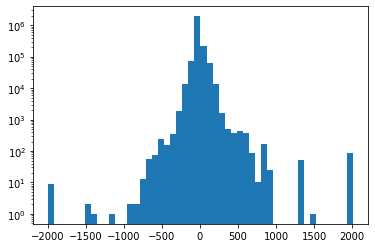

In [154]:
# The very first step is to have a look at the distributions of velocities from each cube
# This block of code looks at the velocities of all the spaxels:

print(np.shape(map_array_ml))
print(np.shape(np.reshape(map_array_ml, np.shape(map_array_ml)[0]*np.shape(map_array_ml)[1])))
flat = np.reshape(map_array_ml, np.shape(map_array_ml)[0]*np.shape(map_array_ml)[1])


plt.clf()
plt.hist(flat, bins=50)#np.ma.masked_where(flat==0, flat))
plt.yscale('log')
plt.show()

# V v interesting, looks like there is a blue wing here
# Which could definitely indicate that there's some
# interesting kinematic things happening.

(402, 5776) (150, 76, 76)


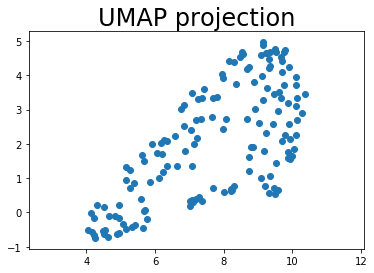

In [273]:
# UMAP is a cool tool for visualizing the 
# similarities and differences in data.

# For a good overview go here - 
# https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668

# It stands for Uniform Manifold Approximation and Projection.
# It projects a dataset down onto a 2D space, where
# objects that have similarity are 'clustered' together.
# However, it is important that this is not a clustering
# algorithm. UMAP and t-SNE are similar and are both good
# first approaches to a dataset to get an idea of
# what we're working with. 


# According to the blog posted above, t-SNE is no longer
# as popular as UMAP because the larger-scale distances 
# between 'clusters' are more meaningful and UMAP scales better
# to large datasets.
print(np.shape(map_array_ml), np.shape(data_ml_rot))
data_ml_rot_flattened = np.reshape(data_ml_rot, (np.shape(data_ml_rot)[0], np.shape(data_ml_rot)[1]**2))
data_ml_rot_vor_flattened = np.reshape(data_ml_rot_vor, (np.shape(data_ml_rot)[0], np.shape(data_ml_rot)[1]**2))

# Quick look: 
import umap.umap_ as umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(data_ml_rot_vor_flattened)

embedding.shape

plt.scatter(embedding[:,0], embedding[:,1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24);

(150, 2)


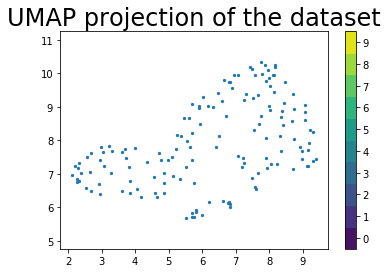

In [274]:

reducer = umap.UMAP(random_state=24)
reducer.fit(data_ml_rot_vor_flattened)
embedding = reducer.transform(data_ml_rot_vor_flattened)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
print(embedding.shape)
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the dataset', fontsize=24);

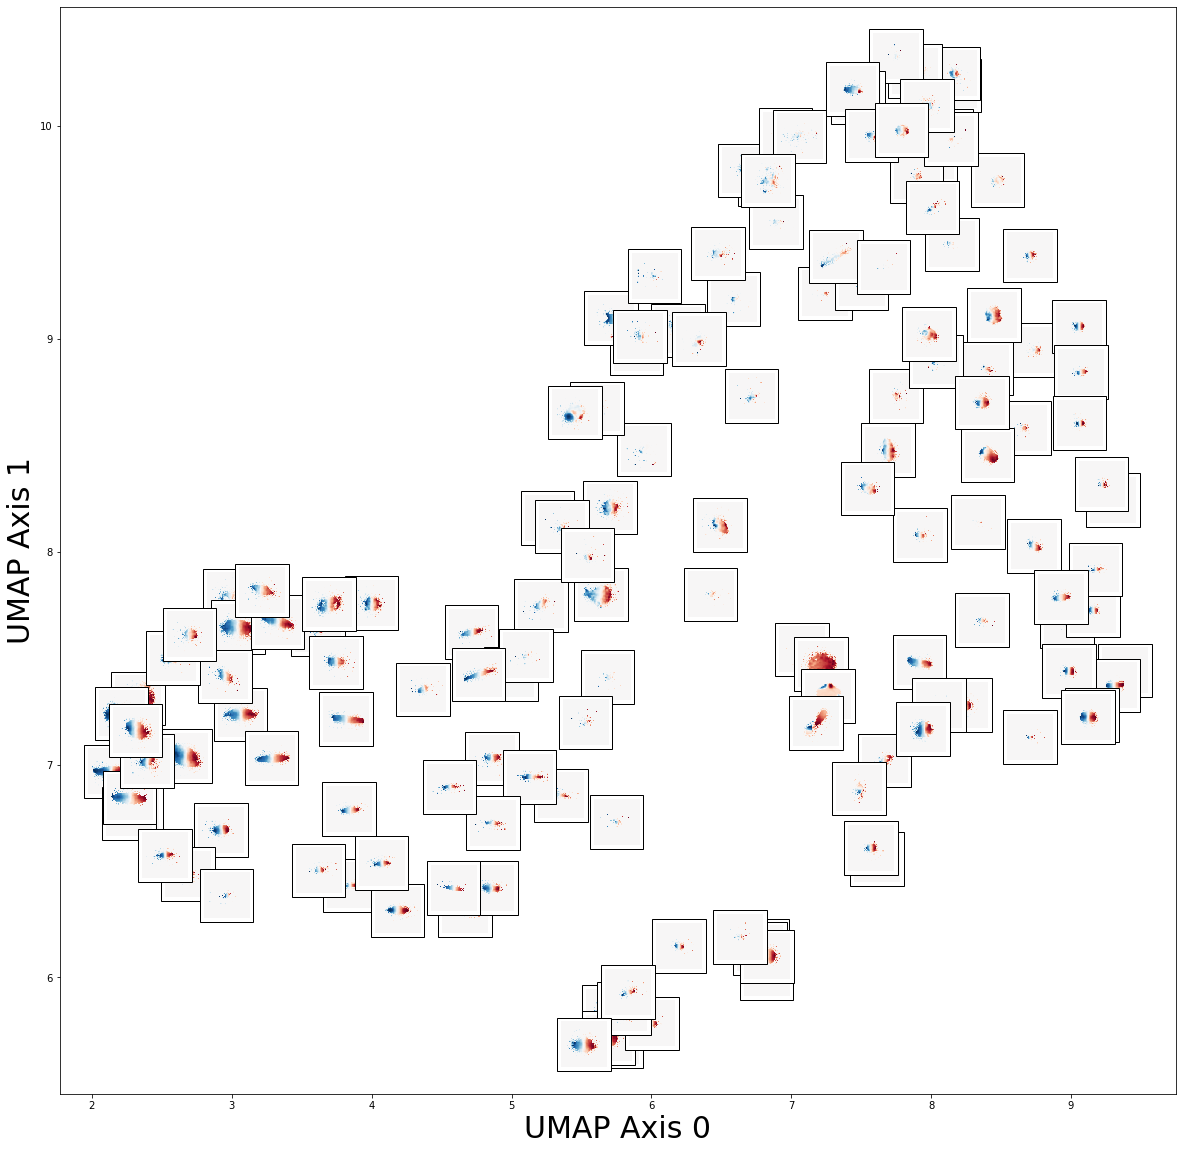

In [275]:
import matplotlib
from matplotlib.offsetbox import OffsetImage, AnnotationBbox 
from matplotlib import pyplot as plt


    


# Imscatter is a cool tool that allows you to overplot
# the velocity maps as the points.
def imscatter(x, y, images, mid_val, ax=None, zoom=0.1):     
        if ax is None:         
                ax = plt.gca()           
        x, y = np.atleast_1d(x, y)     
        artists = []     
        for x0, y0, image0 in zip(x, y, images):
                ima = image0
                im = OffsetImage(ima, zoom=zoom, cmap='RdBu_r', norm=MidpointNormalize(midpoint=mid_val))   
                ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=True)         
                artists.append(ax.add_artist(ab))     
        ax.update_datalim(np.column_stack([x, y]))     
        ax.autoscale()     
        return artists
#np.reshape(map_array_ml[j,:],(shape,shape))
twod = np.reshape(data_ml_rot_flattened, (np.shape(data_ml_rot_flattened)[0],size, size))

fig = plt.figure(figsize=(20,20))
ax1 = plt.gca()
imscatter(embedding[:,0], embedding[:,1], np.ma.masked_where(twod==0, twod),0, ax=ax1, zoom=0.6)
ax1.set_xlabel('UMAP Axis 0', size=30)
ax1.set_ylabel('UMAP Axis 1', size=30)
plt.savefig('umap_rot_vor.png')#, dpi=1000)

# It is clear that UMAP is mostly findig an orientation
# effect, AKA the biggest defining feature of this dataset
# is the orientation of the large-scale axis of rotation.
# This is unsurprising, but we'll have to remove it
# if we want to get at other trends.



number of inputs (150, 76, 76)
names (150,)
number of inputs 150
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
(149, 76, 76) (1, 76, 76)
number of inputs 150
[0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 2 2 2 0 2 0 2 2 0 0 2 0 2
 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 2 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0 0 2
 0 0 0 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0
 0 1 2 2 2 0 2 0 2 0 0 0 0 2 0 2 0 0 2 2 2 2 0 0 0 0 0 2 0 0 0 2 0 0 2 0 2
 0 0]
(96, 76, 76) (1, 76, 76)
number of inputs 150
[3 0 3 3 3 3 0 3 3 0 3 3 3 3 0 0 0 0 3 3 3 3 3 3 0 0 0 3 0 3 0 0 3 3 0 3 0
 3 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 0 0 0 3 3 3 0 3 0 3 3 3 3 3 0 3 0 0 2 0 0
 3 3 3 3 0 3 0 0 3 3 0 0 0 0 0 3 3 0 0 0 3 3 3 3 3 3 3 3 3 3 3 2 3 0 0 3 3
 3 1 

/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


(95, 76, 76) (1, 76, 76)
number of inputs 150
[1 0 1 5 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0
 1 1 1 1 0 4 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 6 1 0 0 1 1
 1 2 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 3 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0
 1 1]


/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

(54, 76, 76) (91, 76, 76)
number of inputs 150
[3 2 3 5 3 3 2 3 3 0 3 3 3 3 2 2 0 2 3 3 3 0 0 3 0 2 2 3 2 3 2 0 3 3 2 3 2
 3 2 3 3 3 3 3 3 3 0 2 3 6 3 3 3 2 2 0 3 3 0 2 3 2 3 3 3 3 3 2 3 0 2 6 0 2
 3 3 0 3 0 7 0 0 3 3 2 2 0 2 2 3 3 2 2 2 3 3 3 0 3 3 3 3 3 3 3 6 3 2 2 3 3
 3 1 2 2 2 3 6 3 2 0 3 3 3 2 0 2 3 3 2 2 4 2 0 3 3 3 3 2 3 3 3 2 3 3 0 0 2
 3 0]


/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

(23, 76, 76) (1, 76, 76)
number of inputs 150
[1 4 1 5 1 1 4 1 1 4 1 1 1 1 0 4 4 4 1 1 1 1 1 1 4 0 0 1 0 1 4 4 1 1 0 1 4
 1 4 1 1 1 1 1 1 1 4 4 1 1 1 1 1 4 4 4 1 1 1 4 4 0 1 1 1 1 1 4 1 4 0 1 4 4
 1 1 1 1 4 7 4 4 1 1 4 0 4 4 4 1 1 4 0 4 1 1 1 1 1 1 1 1 1 1 1 6 1 4 4 1 1
 1 2 0 4 4 1 8 1 0 1 1 1 1 0 1 0 1 1 4 0 3 4 1 1 1 1 1 4 1 1 1 0 1 1 4 1 4
 1 1]


/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

(15, 76, 76) (89, 76, 76)
number of inputs 150
[3 0 3 4 0 3 0 3 3 0 3 0 3 3 6 7 7 0 3 3 3 7 3 3 7 6 6 3 6 3 7 7 3 0 6 3 0
 3 0 3 3 3 3 3 0 3 0 0 0 3 3 3 0 0 7 7 3 3 7 0 0 6 3 3 3 3 3 0 3 7 6 3 0 0
 3 3 7 3 7 8 7 7 3 3 0 6 7 0 0 3 3 0 6 7 3 3 3 3 3 3 0 3 3 0 3 9 0 0 7 3 3
 3 1 6 7 7 3 5 3 6 3 3 3 0 6 3 6 3 3 7 6 2 0 7 3 0 3 3 0 3 3 3 6 3 3 7 7 0
 3 3]


/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

(33, 76, 76) (1, 76, 76)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

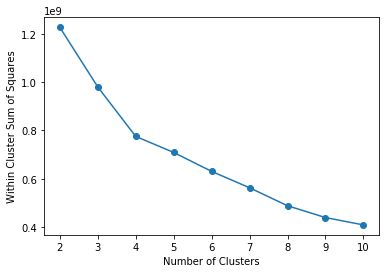

In [276]:
# Try k-means - this tutorial does the digits - https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
#print(np.shape(map_array_ml), np.shape(projected), np.shape(components))
print('number of inputs', np.shape(data_ml_rot))
print('names', np.shape(rotate_ifu))
data_ml_rot_res = np.reshape(data_ml_rot_vor, (np.shape(data_ml_rot_vor)[0], np.shape(data_ml_rot_vor)[1]**2))
from sklearn.cluster import KMeans

# the data needs to be in shape (n_things, x*y), where x and y are the dimensions of each map
# I'm really not sure what to do if the dimensions are different
ncluster_list=[2,3,4,5,6,7,8,9,10]
wcss=[]
for u in ncluster_list:
    nclusters=u
    kmeans = KMeans(n_clusters=nclusters, random_state=0)
    clusters = kmeans.fit_predict(data_ml_rot_res)
    wcss.append(kmeans.inertia_)
    # the center of the cluster is the arithmetic mean of all the 
    # points belonging to the cluster, each point in a cluster is closer
    # to that cluster center than to any other cluster centers

    # Visualizing what the heck this actually looks like

    centers = kmeans.cluster_centers_.reshape(nclusters, shape, shape)


    for j in range(nclusters):
        plt.clf()
        plt.imshow(centers[j], cmap='RdBu_r',norm=MidpointNormalize(midpoint=0))#, vmin=-100, vmax=100)
        plt.colorbar()
        plt.title('Cluster '+str(j)+' Center')
        plt.savefig('nclusters_'+str(nclusters)+'/cluster_center_'+str(j)+'.pdf')

    print('number of inputs', np.shape(data_ml_rot)[0])

    # My next question is is there a way to visualize multiple maps within each class
    print(clusters)
    # these are the cluster IDs of each galaxy
    cluster={}
    cluster_e={}
    ifu={}
    #cluster_name=[]
    for n in range(nclusters):

        cluster[n]=[]
        ifu[n]=[]
        cluster_e[n]=[]
        for j in range(np.shape(data_ml_rot)[0]):
            if clusters[j]==n:
                cluster[n].append(np.reshape(data_ml_rot[j,:],(shape,shape)))
                cluster_e[n].append(np.reshape(data_ml_rot_e[j,:],(shape,shape)))
                ifu[n].append(rotate_ifu[j])
        #cluster_name.append(str(cluster[n]))
    nclusters_list = np.arange(0,nclusters)



    # Plot multiple examples of each class
    for i in range(nclusters):
        plt.clf()
        fig=plt.figure()
        #fig.subplots_adjust(hspace = .5, wspace=.001)
        plt.title('Cluster '+str(i))
        plt.axis('off')

        if np.shape(cluster[i])[0] < 16:
            if np.shape(cluster[i])[0] < 9:
                if np.shape(cluster[i])[0] < 4:
                    for j in range(np.shape(cluster[i])[0]):
                        ax = fig.add_subplot(2,2,j+1)
                        im = ax.imshow(cluster[i][j], cmap='RdBu_r', norm=MidpointNormalize(midpoint=0))#, vmin=-100, vmax=100)
                        plt.colorbar(im)
                        ax.axis('off')
                    plt.savefig('nclusters_'+str(nclusters)+'/selection_'+str(i)+'.pdf')

                else:
                    for j in range(np.shape(cluster[i])[0]):
                        ax = fig.add_subplot(3,3,j+1)
                        im = ax.imshow(cluster[i][j], cmap='RdBu_r', norm=MidpointNormalize(midpoint=0))#, vmin=-100, vmax=100)
                        plt.colorbar(im)
                        ax.axis('off')
                    plt.savefig('nclusters_'+str(nclusters)+'/selection_'+str(i)+'.pdf')
            else:
                for j in range(np.shape(cluster[i])[0]):
                    ax = fig.add_subplot(4,4,j+1)
                    im = ax.imshow(cluster[i][j], cmap='RdBu_r', norm=MidpointNormalize(midpoint=0))#, vmin=-100, vmax=100)
                    plt.colorbar(im)
                    ax.axis('off')
                plt.savefig('nclusters_'+str(nclusters)+'/selection_'+str(i)+'.pdf')
        else:
            for j in range(16):
                ax = fig.add_subplot(4,4,j+1)
                im = ax.imshow(cluster[i][j], cmap='RdBu_r', norm=MidpointNormalize(midpoint=0))#, vmin=-100, vmax=100)
                cbar = plt.colorbar(im)
                cbar.ax.tick_params(labelsize=7) 
                ax.axis('off')
            plt.savefig('nclusters_'+str(nclusters)+'/selection_'+str(i)+'.pdf')
    # Interestingly, without any pre-processing, one thing k-means sorts by is the direction of the velocity gradient.
    # This applies to cluster 1, 5, 6, and 8, which are all oriented differently but basically the same type of map.
    # k-menas also sorts by different sorts of irregularities.
    # one option is to standardize the maps and look at the outcome again (in the next cell)


    # It looks as though these clusters are different in intriguing ways
    print(np.shape(cluster[0]), np.shape(cluster[1]))
    number_of_spaxels = {}
    velocities = {} # this will contain the velocity 
    # aka whether something is fast or slow rotating
    sn = {}
    nfiber = {}
    plt.clf()
    import seaborn as sns
    for n in range(nclusters):
        number_of_spaxels[n]=[]
        velocities[n]=[]
        sn[n]=[]
        nfiber[n]=[]
        for j in range(len(cluster[n])):
            masked = np.ma.masked_where(cluster[n][j]==0.0, cluster[n][j])
            count=0
            if re.split('-',(ifu[n][j]))[1][:3] == '127':
                nfiber[n].append(127)
            else:
                nfiber[n].append(re.split('-',(ifu[n][j]))[1][:2])
                            
            for i in range(76):
                for k in range(76):
                    if cluster[n][j][i,k] != 0.0:
                        count+=1
                        velocities[n].append(cluster[n][j][i,k])
                        sn[n].append(abs(cluster[n][j][i,k]/cluster_e[n][j][i,k]))
            number_of_spaxels[n].append(count)

        plt.hist(number_of_spaxels[n], label='Cluster '+str(n), alpha=0.5, bins=20)
    plt.legend()
    plt.xlabel('Number of Independent Spaxels')

    plt.savefig('nclusters_'+str(nclusters)+'/histogram_nspaxels.pdf')
    plt.clf()
    for n in range(nclusters):
        plt.hist(velocities[n], label='Cluster '+str(n), bins=100, alpha=0.5)
    plt.xlabel('Spaxel Velocity Distribution [km s$^{-1}$]')
    plt.legend()
    plt.savefig('nclusters_'+str(nclusters)+'/histogram_velocities.pdf')

    plt.clf()
    for n in range(nclusters):
        plt.hist(sn[n], label='Cluster '+str(n), bins=100, alpha=0.5)
    plt.xlabel('S/N Distribution')
    plt.xlim([0,50])
    plt.legend()
    plt.savefig('nclusters_'+str(nclusters)+'/histogram_sn.pdf')
    
    plt.clf()
    for n in range(nclusters):
        plt.hist(nfiber[n], label='Cluster '+str(n), bins=5, alpha=0.5,histtype='bar', rwidth=0.8)
    plt.xlabel('Number of Fibers')
    plt.legend()
    plt.savefig('nclusters_'+str(nclusters)+'/histogram_nfiber.pdf')

    
plt.clf()
plt.scatter(ncluster_list, wcss)
plt.plot(ncluster_list, wcss)
plt.ylabel('Within Cluster Sum of Squares')
plt.xlabel('Number of Clusters')
plt.savefig('Elbow_plot.pdf')

In [1]:
# Well the clustering really seems to be mostly by size and/or S/N
# If I cluster into two groupings, then cluster 0 and cluster 1 are mostly characterized as 'slow rotators'
# vs 'fast rotators'

# I'm curious how to go about getting properties of each cluster to figure out what is the true definer
print(np.shape(cluster[0]), np.shape(cluster[1]))
number_of_nonzeros_0=[]
velocities_0 = []
for j in range(len(cluster[0])):
    masked = np.ma.masked_where(cluster[0][j]==0.0, cluster[0][j])
    count=0
    for i in range(76):
        for k in range(76):
            if cluster[0][j][i,k] != 0.0:
                count+=1
                velocities_0.append(cluster[0][j][i,k])
    number_of_nonzeros_0.append(count)
    
number_of_nonzeros_1=[]
velocities_1 = []
for j in range(len(cluster[1])):
    masked = np.ma.masked_where(cluster[1][j]==0.0, cluster[1][j])
    count=0
    for i in range(76):
        for k in range(76):
            if cluster[1][j][i,k] != 0.0:
                count+=1
                velocities_1.append(cluster[0][j][i,k])
    number_of_nonzeros_1.append(count)
print(np.mean(number_of_nonzeros_0))
plt.hist(number_of_nonzeros_0, label='Cluster 0')



print(np.mean(number_of_nonzeros_1))
plt.hist(number_of_nonzeros_1, label='Cluster 1')
plt.legend()
plt.show()


sns.palplot(sns.color_palette("Paired"))

plt.clf()
plt.hist(velocities_0, label='Cluster 0', bins=20)

plt.hist(velocities_1, label='Cluster 1', bins=20)
plt.legend()
plt.xlim([-200,200])
plt.show()

NameError: name 'np' is not defined

In [ ]:
####~~~~~~~~~ EVERYTHING I HAVE MODIFIED IS ABOVE THIS

In [252]:
# Another unsupervised approach is to use SOM (self-organizing maps)
# It is an artificial neural network
# that learns similarities in data
from minisom import MiniSom
som = MiniSom(30, 30, 5776, sigma=4,
              learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(np.reshape(data_ml_rot, (np.shape(data_ml_rot)[0], np.shape(data_ml_rot)[1]**2)))
print("Training...")
som.train_random(np.reshape(data_ml_rot, (np.shape(data_ml_rot)[0], np.shape(data_ml_rot)[1]**2)), 5000, verbose=True)  # random training
print("\n...ready!")

/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/minisom.py:304: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


Training...
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.38869329629174637
 topographic error: 0.02666666666666667

...ready!


/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/minisom.py:410: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


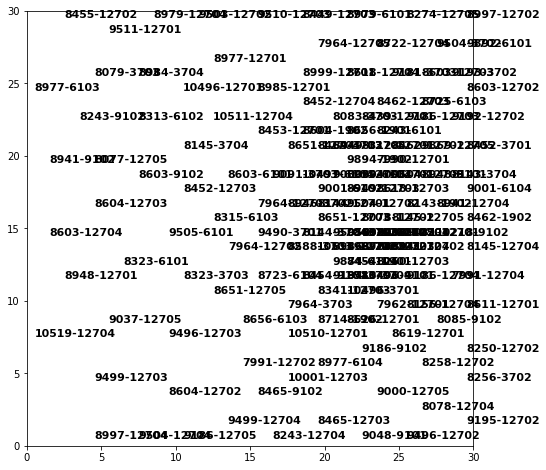

<Figure size 432x288 with 0 Axes>

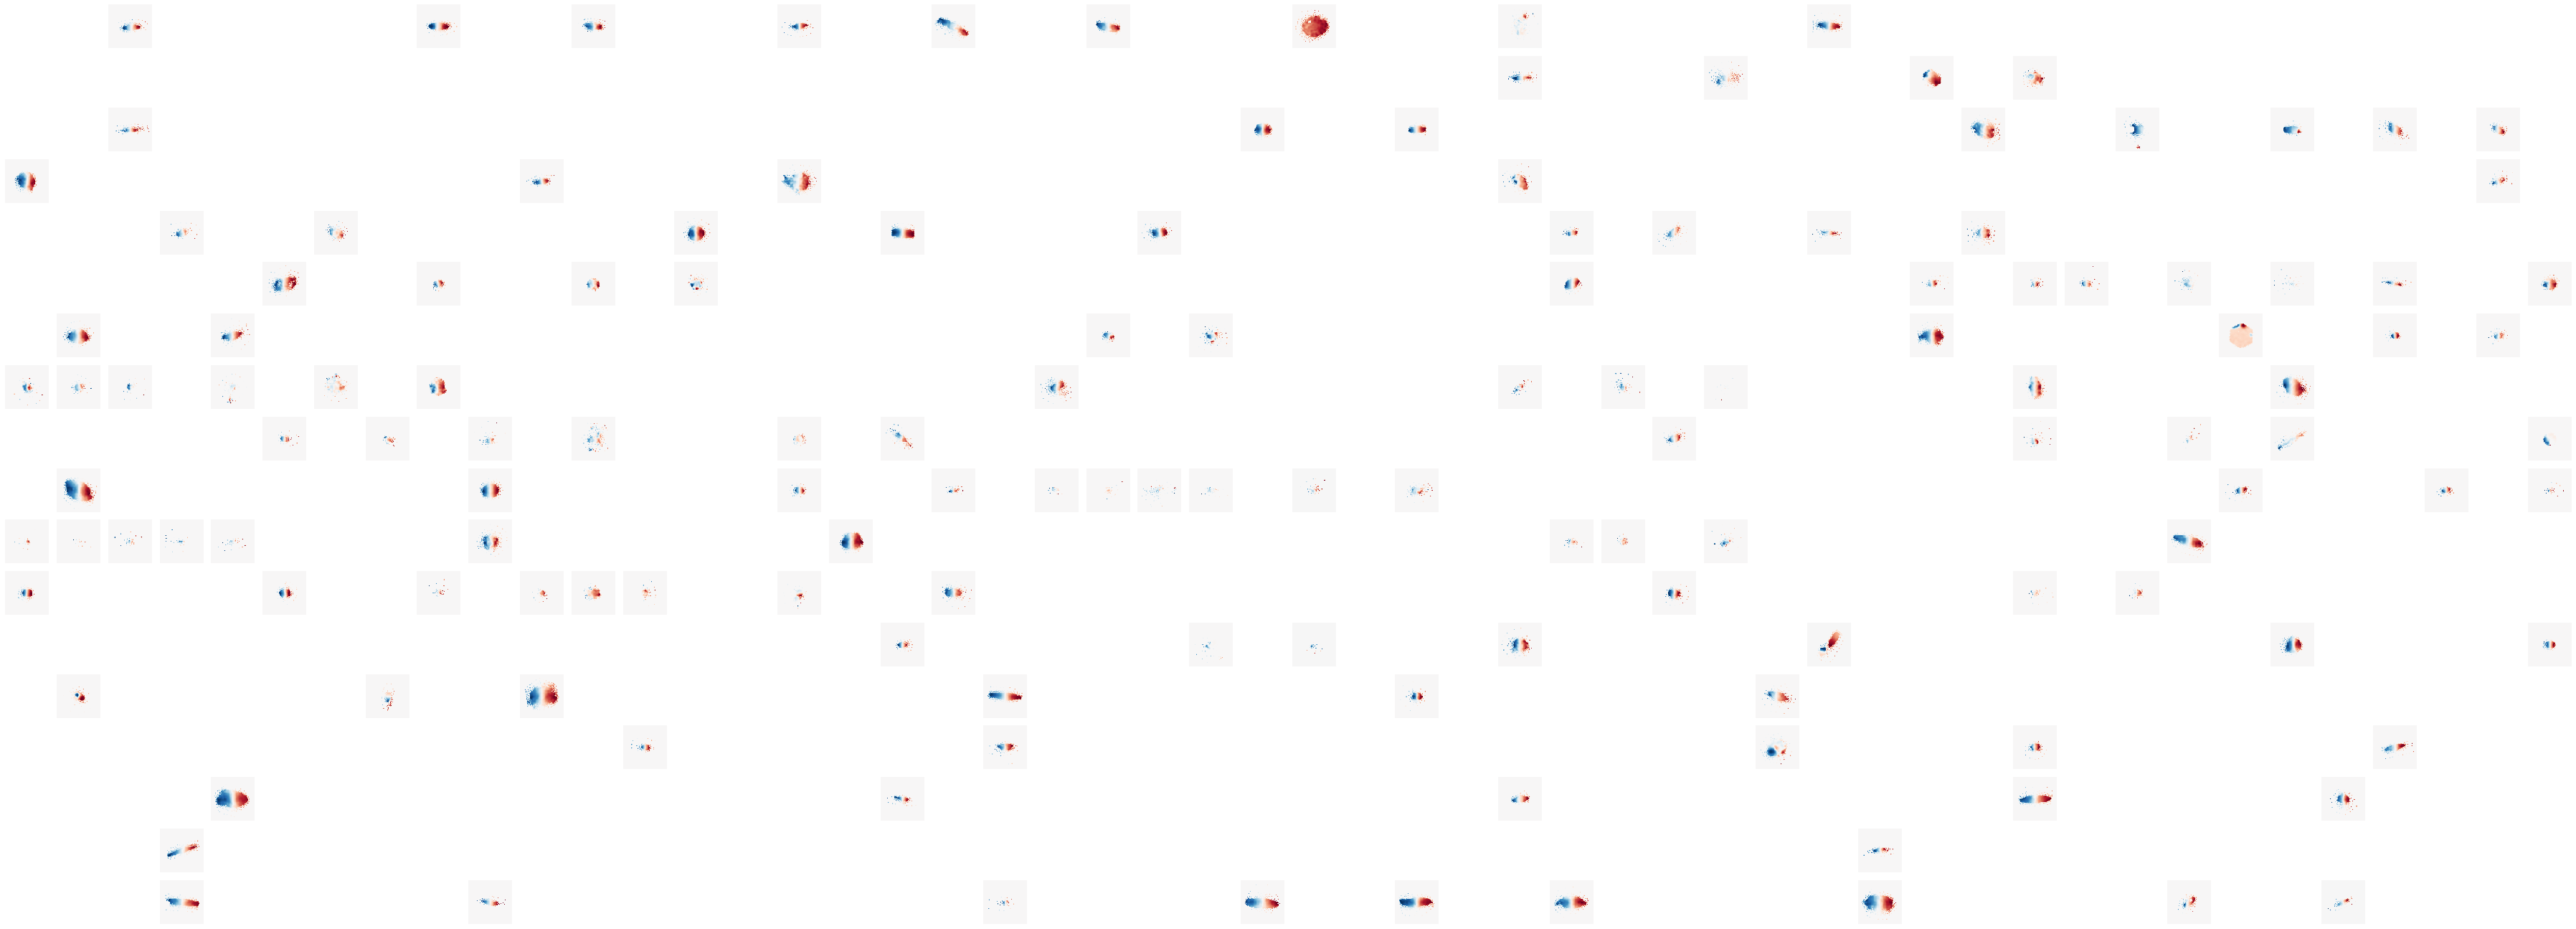

In [260]:
# This will plot the kinematic maps on the SOM space
data = np.reshape(data_ml_rot, (np.shape(data_ml_rot)[0], np.shape(data_ml_rot)[1]**2))
num = ifu_name
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    #imscatter(w[0]+.5,w[1]+.5, np.ma.masked_where(im==0, im), ax=ax1, zoom=0.4)

    ax1.text(w[0]+.5,  w[1]+.5,  str(t), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
ax1.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.savefig('som.png')
plt.show()

plt.clf()
plt.figure(figsize=(50, 50), facecolor='white')
cnt = 0
for j in reversed(range(30)):  # images mosaic
    for i in range(30):
        plt.subplot(50, 50, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(np.reshape(data[wmap[(i, j)]],(size,size)),
                       cmap='RdBu_r', norm=MidpointNormalize(midpoint=0))
        else:
            #continue
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
plt.savefig('som_imgs.png')
plt.show()

# Interesting result here

In [ ]:
# Working on a CNN?
# I'm not sure what this section of code is
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

import numpy as np

temp = []
for img in x_train:
    t = []
    for row in img:
        for i in row:
            t.append(i)
    temp.append(t)
x_train = []
x_train = temp

x_train = np.array(x_train)

x_train = x_train.reshape(60000,784)

model = Sequential()
model.add(Dense(784,activation='relu',input_dim=784))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(784,activation='relu'))

model.compile(loss=keras.losses.mean_squared_error,
             optimizer=keras.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0),
             metrics = ['accuracy'])

model.fit(x_train,x_train,verbose=1,epochs=10,batch_size=256)
model.save('C:\\Users\\Rohith\\Documents\\Rohith_Stuff\\Datasets\\auto_en.h5')
#del model

from keras.models import load_model
import cv2

model = load_model('C:\\Users\\Rohith\\Documents\\Rohith_Stuff\\Datasets\\auto_en.h5')

test = x_train[1].reshape(1,784)
y_test = model.predict(test)

inp_img = []
temp = []
for i in range(len(test[0])):
    if((i+1)%28 == 0):
        temp.append(test[0][i])
        inp_img.append(temp)
        temp = []
    else:
        temp.append(test[0][i])
out_img = []
temp = []
for i in range(len(y_test[0])):
    if((i+1)%28 == 0):
        temp.append(y_test[0][i])
        out_img.append(temp)
        temp = []
    else:
        temp.append(y_test[0][i])
        
inp_img = np.array(inp_img)
out_img = np.array(out_img)
        
cv2.imshow('Test Image',inp_img)
cv2.imshow('Output Image',out_img)
cv2.waitKey(0)
#view rawAutoEncoder_MNIST.py hosted with ❤ by GitHub

In [105]:
# Gaussian mixture models
from sklearn.mixture import GaussianMixture as GMM

nclusters=10
model = GMM(nclusters).fit(map_array_ml)
    #np.reshape(map_array_ml,(np.shape(map_array_ml)[0],size, size) ))
print(model)
print(model.get_params)

print(model.means_)
print('\n')
print(model.covariances_)
STOP


n_components = np.arange(1, 11)
models = [GMM(n, covariance_type='full', random_state=0).fit(map_array_ml)
          for n in n_components]

plt.plot(n_components, [m.bic(map_array_ml_rot_inv) for m in models], label='BIC')
plt.plot(n_components, [m.aic(map_array_ml_rot_inv) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)
<bound method BaseEstimator.get_params of GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


[[[1.e-06 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
  [0.e+00 1.e-06 0.e+00 ... 0.e+00 0.e+00 0.e+00]
  [0.e+00 0.e+00 1.e-06 ... 0.e+00 0.e+00 0.e+00]
  ...

NameError: name 'STOP' is not defined

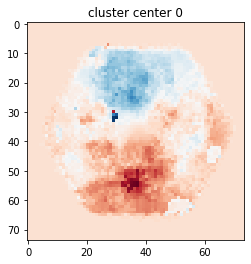

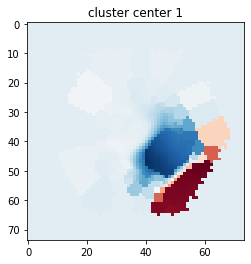

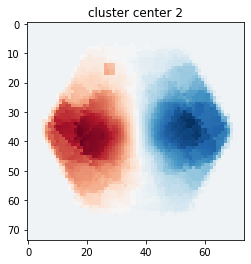

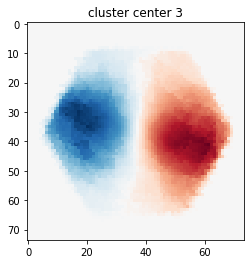

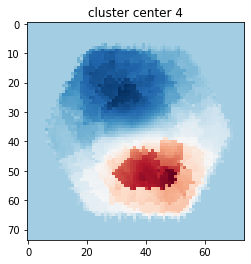

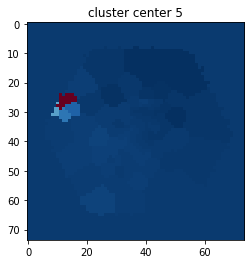

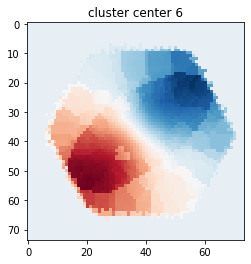

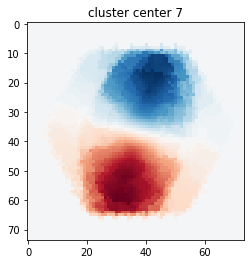

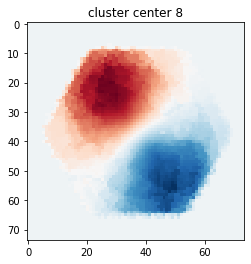

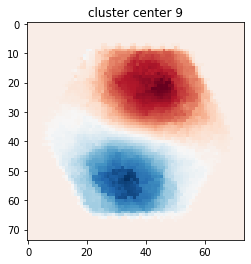

In [106]:
for j in range(nclusters):
    plt.clf()
    plt.imshow(np.reshape(model.means_[j], (size, size)), cmap='RdBu_r')
    plt.title('cluster center '+str(j))
    plt.show()

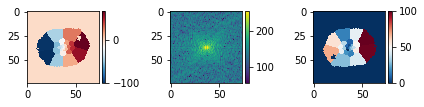

(74, 74)


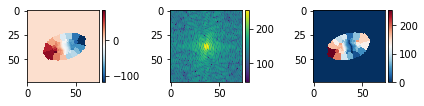

In [200]:
# It is clear that the clustering is still variant to the dipole moment
# Try to Fourier transform the image
import cv2
tester_image = np.reshape(map_array_ml[0], (size, size))
f = cv2.dft(np.float32(tester_image), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shift = np.fft.fftshift(f)
f_complex = f_shift[:,:,0] + 1j*f_shift[:,:,1]
f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
f_bounded = 20 * np.log(f_abs)
f_img = 255 * f_bounded / np.max(f_bounded)
f_img = f_img.astype(np.uint8)


fig = plt.figure()
ax0 = fig.add_subplot(131)
im0 = ax0.imshow(tester_image, cmap='RdBu_r')
plt.colorbar(im0,fraction=0.046, pad=0.04)

ax1 = fig.add_subplot(132)
im1 = ax1.imshow(f_img)
plt.colorbar(im1,fraction=0.046, pad=0.04)


inv_img = np.fft.ifft2(f_complex) # inverse F.T.
filtered_img = np.abs(inv_img)
#print(tester_image.min())
#filtered_img -= tester_image.min()

#filtered_img = filtered_img/ tester_image.max()

#filtered_img = filtered_img.astype(np.uint8)

ax2 = fig.add_subplot(133)
im2 = ax2.imshow(filtered_img, cmap='RdBu_r')
plt.colorbar(im2, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()
# So what we're seeing in this star pattern is - low frequency component towards the center
# higher frequency things are smaller structures in images

# Compare the above result to a different looking stellar velocity map

tester_image = np.reshape(map_array_ml[1], (size, size))
f = cv2.dft(np.float32(tester_image), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shift = np.fft.fftshift(f)
f_complex = f_shift[:,:,0] + 1j*f_shift[:,:,1]
f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
f_bounded = 20 * np.log(f_abs)
f_img = 255 * f_bounded / np.max(f_bounded)
f_img = f_img.astype(np.uint8)

fig = plt.figure()
ax0 = fig.add_subplot(131)
im0 = ax0.imshow(tester_image, cmap='RdBu_r')
plt.colorbar(im0,fraction=0.046, pad=0.04)

ax1 = fig.add_subplot(132)
im1 = ax1.imshow(f_img)
plt.colorbar(im1,fraction=0.046, pad=0.04)

print(np.shape(f_complex))
inv_img = np.fft.ifft2(f_complex) # inverse F.T.
filtered_img = np.abs(inv_img)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)

ax2 = fig.add_subplot(133)
im2 = ax2.imshow(filtered_img, cmap='RdBu_r')
plt.colorbar(im2, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

(201, 5476)


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


[[ 7.93089150e-10  2.26355746e-03 -4.86121248e-04 ... -1.58575440e-03
   4.92965920e-04  7.15529992e-04]
 [ 2.26355746e-03  2.23519581e+05 -5.47334550e+04 ...  9.01523282e+03
   5.19419888e+04  5.30018524e+04]
 [-4.86121248e-04 -5.47334550e+04  2.53062780e+05 ...  1.77302134e+04
   6.27337260e+04  2.05505697e+04]
 ...
 [-1.58575440e-03  9.01523282e+03  1.77302134e+04 ...  1.35300201e+05
  -1.43927854e+04 -1.74782879e+04]
 [ 4.92965920e-04  5.19419888e+04  6.27337260e+04 ... -1.43927854e+04
   1.61304794e+05 -4.24850367e+04]
 [ 7.15529992e-04  5.30018524e+04  2.05505697e+04 ... -1.74782879e+04
  -4.24850367e+04  1.37314801e+05]]
GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=100.0, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)
<bound method BaseEstimator.get_params of GaussianMixture(c

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

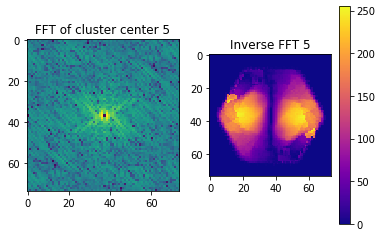

In [203]:
# Make everything into an FFT:
print(np.shape(map_array_ml))
map_array_ml_FFT = np.zeros((np.shape(map_array_ml)[0], size, size))
for j in range(np.shape(map_array_ml)[0]):
    tester_image = np.reshape(map_array_ml[j], (size, size))
    f = cv2.dft(np.float32(tester_image), flags=cv2.DFT_COMPLEX_OUTPUT)
    f_shift = np.fft.fftshift(f)
    f_complex = f_shift[:,:,0] + 1j*f_shift[:,:,1]
    f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
    f_bounded = np.log(f_abs)
    #f_img = 255 * f_bounded / np.max(f_bounded)
    #f_img = f_img.astype(np.uint8)
    map_array_ml_FFT[j,:,:] = f_complex
    
# Gaussian mixture models
from sklearn.mixture import GaussianMixture as GMM
size = int(np.sqrt(np.shape(map_array_ml[0])[0]))
nclusters=6
reshape_FFT = np.reshape(map_array_ml_FFT, (np.shape(map_array_ml_FFT)[0], size*size))

cov = np.cov(reshape_FFT, rowvar=False, bias=True)
print(cov)
model = GMM(nclusters, reg_covar = 1e2).fit(reshape_FFT)
    #np.reshape(map_array_ml,(np.shape(map_array_ml)[0],size, size) ))
print(model)
print(model.get_params)

print(model.means_)
print('\n')
print(model.covariances_)
for j in range(nclusters):
    plt.clf()
    fig = plt.figure()
    ax0 = fig.add_subplot(121)
    
    f_abs = np.abs(model.means_[j]) + 1 # lie between 1 and 1e6
    f_bounded = 20 * np.log(f_abs)
    f_img = 255 * f_bounded / np.max(f_bounded)
    f_img = f_img.astype(np.uint8)
    im0 = ax0.imshow(np.reshape(f_img, (size, size)))
    ax0.set_title('FFT of cluster center '+str(j))
    
    
    # So what this actually is f_complex gone through these transformation:
    
    fft_2d = np.reshape(model.means_[j], (size,size))
    
    inv_img = np.fft.ifft2(fft_2d) # inverse F.T.
    #filtered_img = np.abs(inv_img)
    
    filtered_img = np.abs(inv_img)
    filtered_img -= filtered_img.min()
    filtered_img = filtered_img*255 / filtered_img.max()
    filtered_img = filtered_img.astype(np.uint8)
    ax1 = fig.add_subplot(122)
    im1 = ax1.imshow(filtered_img, cmap='plasma')
    ax1.set_title('Inverse FFT '+str(j))
    plt.colorbar(im1)
    
   
    
    plt.savefig('FFT_GMM_cluster_center_'+str(j)+'.pdf')
    
    
    
# Perhaps this got rid of some rotational problems?
# Let us investigate by looking at one of the clusters

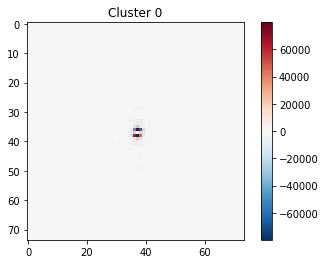

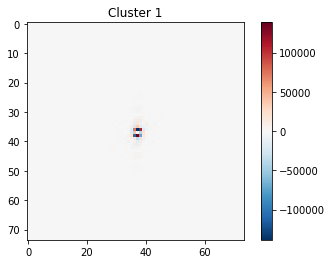

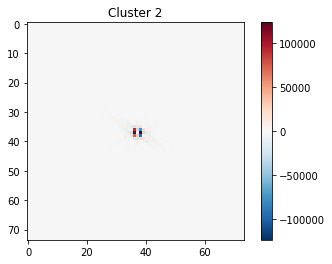

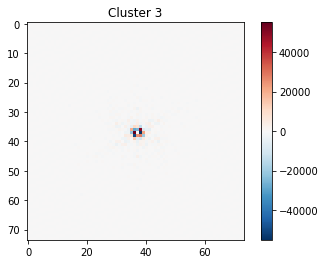

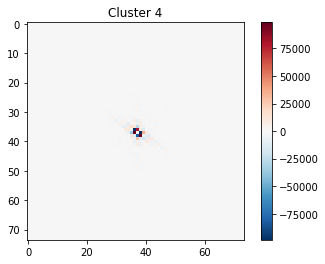

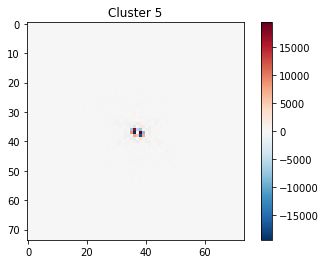

[2 3 5 0 5 5 0 3 0 1 5 1 1 4 2 5 0 5 1 5 5 5 3 4 5 1 5 3 0 0 5 5 1 5 5 2 2
 5 5 4 0 3 5 0 4 3 5 5 5 2 5 5 4 5 5 5 2 1 1 4 5 2 5 4 1 3 0 0 3 5 3 5 0 5
 5 0 3 5 3 0 5 4 0 4 3 0 5 0 3 2 5 0 3 5 5 3 2 5 3 5 5 1 4 5 5 3 3 0 5 1 5
 4 5 0 1 2 5 3 1 5 5 5 5 2 3 2 5 5 0 3 3 1 0 3 5 5 3 2 2 2 4 3 4 0 2 5 5 4
 0 0 1 5 2 5 3 3 4 2 5 2 3 0 5 5 3 5 0 4 5 2 4 1 3 5 4 5 3 3 1 3 4 5 0 2 5
 5 3 0 5 1 3 5 5 3 1 5 5 5 2 5 5]


<Figure size 432x288 with 0 Axes>

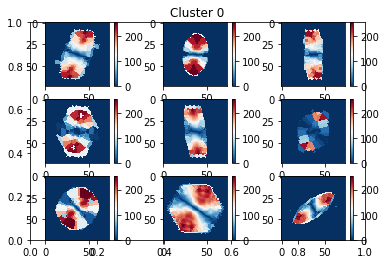

<Figure size 432x288 with 0 Axes>

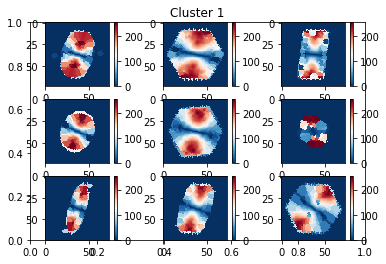

<Figure size 432x288 with 0 Axes>

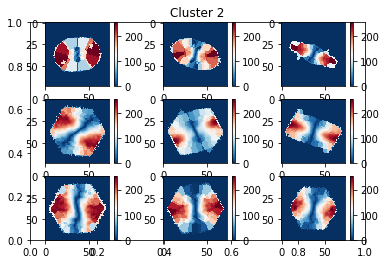

<Figure size 432x288 with 0 Axes>

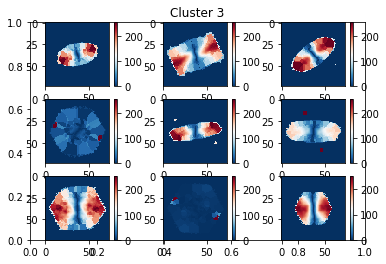

<Figure size 432x288 with 0 Axes>

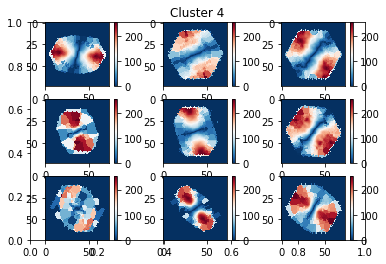

<Figure size 432x288 with 0 Axes>

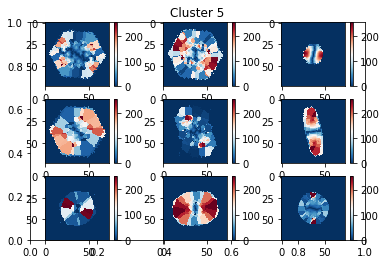

In [207]:
    
# Perhaps this got rid of some rotational problems?
# Let us investigate by looking at one of the clusters
'''fft_2d = np.reshape(model.means_[j], (size,size))
    
inv_img = np.fft.ifft2(fft_2d) # inverse F.T.
#filtered_img = np.abs(inv_img)

filtered_img = np.abs(inv_img)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)
ax1 = fig.add_subplot(122)
im1 = ax1.imshow(filtered_img, cmap='plasma')
ax1.set_title('Inverse FFT '+str(j))'''

clusters = model.fit_predict(reshape_FFT)
# the center of the cluster is the arithmetic mean of all the 
# points belonging to the cluster, each point in a cluster is closer
# to that cluster center than to any other cluster centers

# Visualizing what the heck this actually looks like

centers = model.means_.reshape(nclusters, shape, shape)


for j in range(nclusters):
    plt.clf()
    plt.imshow(centers[j], cmap='RdBu_r')#, vmin=-100, vmax=100)
    plt.colorbar()
    plt.title('Cluster '+str(j))
    plt.show()


# My next question is is there a way to visualize multiple maps within each class
print(clusters)
# these are the cluster IDs of each galaxy
cluster={}
#cluster_name=[]
for n in range(nclusters):
    
    cluster[n]=[]
    for j in range(np.shape(map_array_ml)[0]):
        if clusters[j]==n:
            inv_img = np.fft.ifft2(np.reshape(reshape_FFT[j,:],(shape,shape))) # inverse F.T.
            #filtered_img = np.abs(inv_img)

            filtered_img = np.abs(inv_img)
            filtered_img -= filtered_img.min()
            filtered_img = filtered_img*255 / filtered_img.max()
            filtered_img = filtered_img.astype(np.uint8)
            cluster[n].append(filtered_img)
    #cluster_name.append(str(cluster[n]))
    
# Plot multiple examples of each class
for i in range(nclusters):
    plt.clf()
    fig=plt.figure()
    #fig.subplots_adjust(hspace = .5, wspace=.001)
    plt.title('Cluster '+str(i))
    
    if np.shape(cluster[i])[0] < 9:
        for j in range(np.shape(cluster[i])[0]):
            ax = fig.add_subplot(3,3,j+1)
            im = ax.imshow(cluster[i][j], cmap='RdBu_r')#, vmin=-100, vmax=100)
            plt.colorbar(im)
        plt.show()
    else:
        for j in range(9):
            ax = fig.add_subplot(3,3,j+1)
            im = ax.imshow(cluster[i][j], cmap='RdBu_r')#, vmin=-100, vmax=100)
            plt.colorbar(im)
        plt.show()


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/minisom.py:300: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


Training...
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 67.56500312857115
 topographic error: 0.6915422885572139

...ready!


In [ ]:
Principal component analysis (PCA)
Anomaly detection
Autoencoders
Deep belief nets
Hebbian learning
Generative adversarial networks (GANs)
Self-organizing maps

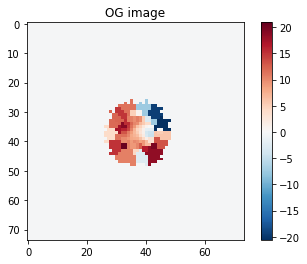

coeffs shape (2,)
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), (array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])))
(39, 39)


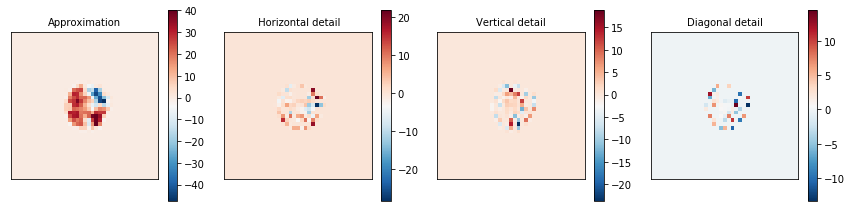

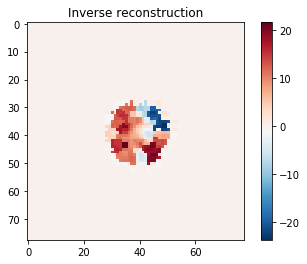

In [163]:
# What about using a fourier transform that is localized in space - wavelet
import pywt
# Wavelet transform of image, and plot approximation and details
tester_image = np.reshape(map_array_ml[100], (size, size))

plt.imshow(tester_image, cmap='RdBu_r')
plt.title('OG image')
plt.colorbar()
plt.show()
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(tester_image, 'bior1.3')
print('coeffs shape',np.shape(coeffs2))
print(coeffs2)
LL, (LH, HL, HH) = coeffs2
print(np.shape(LL))
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    im = ax.imshow(a, interpolation="nearest", cmap='RdBu_r')
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.colorbar(im)

fig.tight_layout()
plt.show()

plt.imshow(pywt.idwt2(coeffs2, 'haar'), cmap='RdBu_r')
plt.title('Inverse reconstruction')
plt.colorbar()
plt.show()

'''plt.imshow(tester_image-pywt.idwt2(coeffs2))#, 'haar'))
plt.colorbar()
plt.show()'''
size_DWT = np.shape(LL)[0]
map_array_ml_DWT_coeffs = np.zeros((np.shape(map_array_ml)[0], size_DWT, size_DWT))

map_array_ml_DWT_LL = np.zeros((np.shape(map_array_ml)[0], size_DWT, size_DWT))
map_array_ml_DWT_LH = np.zeros((np.shape(map_array_ml)[0], size_DWT, size_DWT))
map_array_ml_DWT_HL = np.zeros((np.shape(map_array_ml)[0], size_DWT, size_DWT))
map_array_ml_DWT_HH = np.zeros((np.shape(map_array_ml)[0], size_DWT, size_DWT))
for j in range(np.shape(map_array_ml)[0]):
    tester_image = np.reshape(map_array_ml[j], (size, size))
    coeffs2 = pywt.dwt2(tester_image, 'bior1.3')
    LL, (LH, HL, HH) = coeffs2
    map_array_ml_DWT_LL[j,:,:] = LL
    map_array_ml_DWT_LH[j,:,:] = LH
    map_array_ml_DWT_HL[j,:,:] = HL
    map_array_ml_DWT_HH[j,:,:] = HH

(2,)
(array([0., 0., 0., ..., 0., 0., 0.]), (array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.])))


ValueError: Axis greater than data dimensions

<Figure size 432x288 with 0 Axes>

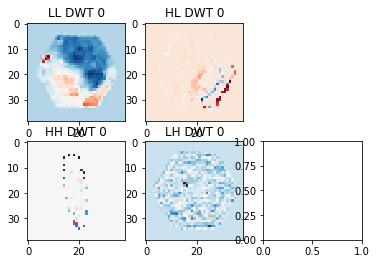

In [162]:
# Gaussian mixture models
from sklearn.mixture import GaussianMixture as GMM
size = int(np.sqrt(np.shape(map_array_ml[0])[0]))
nclusters=5
reshape_DWT_LL = np.reshape(map_array_ml_DWT_LL, (np.shape(map_array_ml_DWT_LL)[0], size_DWT*size_DWT))
model_LL = GMM(nclusters).fit(reshape_DWT_LL)

reshape_DWT_HL = np.reshape(map_array_ml_DWT_HL, (np.shape(map_array_ml_DWT_HL)[0], size_DWT*size_DWT))
model_HL = GMM(nclusters).fit(reshape_DWT_HL)

reshape_DWT_LH = np.reshape(map_array_ml_DWT_LH, (np.shape(map_array_ml_DWT_LH)[0], size_DWT*size_DWT))
model_LH = GMM(nclusters).fit(reshape_DWT_LH)

reshape_DWT_HH = np.reshape(map_array_ml_DWT_HH, (np.shape(map_array_ml_DWT_HH)[0], size_DWT*size_DWT))
model_HH = GMM(nclusters).fit(reshape_DWT_HH)
    #np.reshape(map_array_ml,(np.shape(map_array_ml)[0],size, size) ))
'''print(model)
print(model.get_params)

print(model.means_)
print('\n')
print(model.covariances_)'''
for j in range(nclusters):
    plt.clf()
    fig = plt.figure()
    ax0 = fig.add_subplot(231)
    im0 = ax0.imshow(np.reshape(model_LL.means_[j], (size_DWT, size_DWT)), cmap='RdBu_r')
    ax0.set_title('LL DWT '+str(j))
    
    ax1 = fig.add_subplot(232)
    im1 = ax1.imshow(np.reshape(model_HL.means_[j], (size_DWT, size_DWT)), cmap='RdBu_r')
    ax1.set_title('HL DWT '+str(j))
    
    ax2 = fig.add_subplot(234)
    im2 = ax2.imshow(np.reshape(model_HH.means_[j], (size_DWT, size_DWT)), cmap='RdBu_r')
    ax2.set_title('HH DWT '+str(j))
    
    ax3 = fig.add_subplot(235)
    im3 = ax3.imshow(np.reshape(model_LH.means_[j], (size_DWT, size_DWT)), cmap='RdBu_r')
    ax3.set_title('LH DWT '+str(j))
    
    '''plt.show()
    continue'''
    coeffs2 = model_LL.means_[j], (model_LH.means_[j], model_HL.means_[j], model_HH.means_[j])
    print(np.shape(coeffs2))
    print(coeffs2)
    ax4 = fig.add_subplot(236)
    im4 = ax4.imshow(pywt.idwt2(coeffs2, 'haar'), cmap='RdBu_r')
    ax4.set_title('Inverse DWT '+str(j))
    
    plt.show()
    
    
    
# Now you will 

(201, 5476)


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)
<bound method BaseEstimator.get_params of GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)>
[[4.90604343 5.27375999 5.27226663 ... 5.35937192 5.37615696 5.30036375]
 [5.94514883 6.17022024 6.18985674 ... 6.23300553 6.22769664 6.26401181]]


[[[1.26418158 0.24022651 0.2673978  ... 0.1260011  0.10936818 0.21892227]
  [0.24022651 0.55906854 0.25863536 ... 0.11375786 0.20973034 0.16636036]
  [0.2673978  0.25863536 0.64625167 ... 0.11838181

<Figure size 432x288 with 0 Axes>

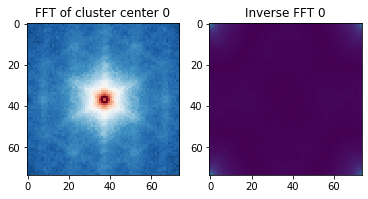

<Figure size 432x288 with 0 Axes>

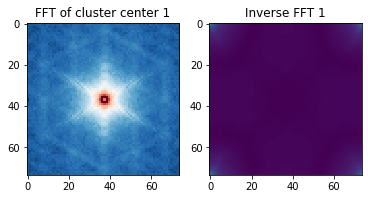

In [25]:
size = int(np.sqrt(np.shape(map_array_ml[0])[0]))
tester = np.reshape(map_array_ml[0],(size,size))
y_pred = model.predict(tester)
print(y_pred)

ValueError: Expected the input data X have 5476 features, but got 74 features

size =  74
should be shape 6 80 480


<Figure size 432x288 with 0 Axes>

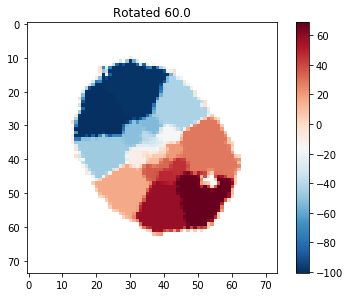

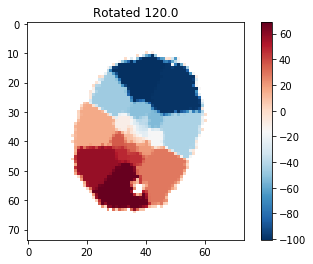

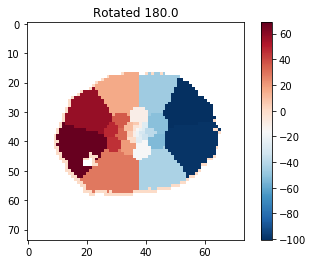

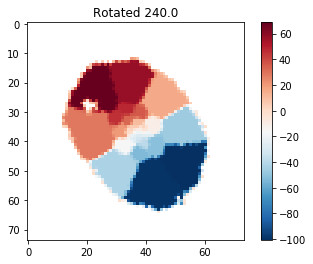

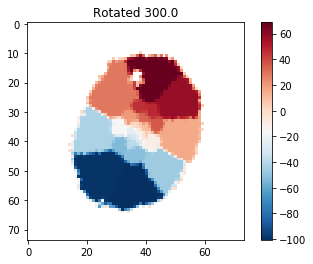

done


In [30]:
# First try to make the maps:
# 1. Scale - invariant ()
# 2. Rotation - invariant (rotate)
# 3. Size - invariant (zoom in)


from matplotlib import pyplot as plt
from skimage import transform
from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
import math




size = int(np.sqrt(np.shape(map_array_ml[0])))
n_gals = int(np.shape(map_array_ml)[0])

# rotation is in radians

input_rot = math.radians(45)
tform = AffineTransform(rotation=input_rot)
test_image = np.reshape(np.array(map_array_ml[3]),(size, size))
test_image = np.ma.masked_where(test_image==0, test_image)
rot = warp(test_image, tform.inverse)




plt.clf()
fig = plt.figure()
ax0 = fig.add_subplot(231)
im0 = ax0.imshow(test_image, cmap='RdBu_r')
plt.colorbar(im0,fraction=0.046, pad=0.04)
ax0.set_xticks([0,size/2, size])
ax0.set_yticks([0,size/2, size])

ax0.set_xticklabels([-size/4, 0, size/4])
ax0.set_yticklabels([-size/4, 0, size/4])

print('size = ', size)

shift_y, shift_x = np.array(test_image.shape[:2]) / 2.
tf_rotate = transform.SimilarityTransform(rotation=np.deg2rad(60))
tf_shift = transform.SimilarityTransform(translation=[-shift_x, -shift_y])
tf_shift_inv = transform.SimilarityTransform(translation=[shift_x, shift_y])

rot = transform.warp(test_image, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)
rot = np.ma.masked_where(rot==0, rot)

ax1 = fig.add_subplot(232)
im1 = ax1.imshow(rot, cmap='RdBu_r')
ax1.set_title('Rot = 60')
ax1.axis('off')

#plt.colorbar(im1)

shift_y, shift_x = np.array(test_image.shape[:2]) / 2.
tf_rotate = transform.SimilarityTransform(rotation=np.deg2rad(120))
tf_shift = transform.SimilarityTransform(translation=[-shift_x, -shift_y])
tf_shift_inv = transform.SimilarityTransform(translation=[shift_x, shift_y])

rot = transform.warp(test_image, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)
rot = np.ma.masked_where(rot==0, rot)

ax2 = fig.add_subplot(233)
im2 = ax2.imshow(rot, cmap='RdBu_r')
ax2.set_title('Rot = 120')
ax2.axis('off')
#plt.colorbar(im2)

shift_y, shift_x = np.array(test_image.shape[:2]) / 2.
tf_rotate = transform.SimilarityTransform(rotation=np.deg2rad(180))
tf_shift = transform.SimilarityTransform(translation=[-shift_x, -shift_y])
tf_shift_inv = transform.SimilarityTransform(translation=[shift_x, shift_y])

rot = transform.warp(test_image, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)
rot = np.ma.masked_where(rot==0, rot)

ax3 = fig.add_subplot(234)
im3 = ax3.imshow(rot, cmap='RdBu_r')
ax3.set_title('Rot = 180')
ax3.axis('off')

shift_y, shift_x = np.array(test_image.shape[:2]) / 2.
tf_rotate = transform.SimilarityTransform(rotation=np.deg2rad(240))
tf_shift = transform.SimilarityTransform(translation=[-shift_x, -shift_y])
tf_shift_inv = transform.SimilarityTransform(translation=[shift_x, shift_y])

rot = transform.warp(test_image, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)
rot = np.ma.masked_where(rot==0, rot)
ax4 = fig.add_subplot(235)
im4 = ax4.imshow(rot, cmap='RdBu_r')
ax4.set_title('Rot = 240')
ax4.axis('off')

shift_y, shift_x = np.array(test_image.shape[:2]) / 2.
tf_rotate = transform.SimilarityTransform(rotation=np.deg2rad(300))
tf_shift = transform.SimilarityTransform(translation=[-shift_x, -shift_y])
tf_shift_inv = transform.SimilarityTransform(translation=[shift_x, shift_y])

rot = transform.warp(test_image, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)
rot = np.ma.masked_where(rot==0, rot)
ax5 = fig.add_subplot(236)
im5 = ax5.imshow(rot, cmap='RdBu_r')
ax5.set_title('Rot = 300')
ax5.axis('off')
#plt.colorbar(im3)
plt.tight_layout()
plt.savefig('rotation_invariant.pdf')


# What if we created a new map_array_ml where it was populated with each galaxy rotated around
# its center?
n_rot =6
print('should be shape', n_rot, n_gals, n_rot*n_gals)
map_array_ml_rot_inv = np.zeros((n_rot*n_gals,shape**2))#np.zeros((len(plateifu_list),74**2))
counter=0
for j in range(n_gals-1):
    test_image = np.reshape(np.array(map_array_ml[j]),(size, size))
    
    for i in range(n_rot):
        # First, append with the OG image if i==0
        if i==0:
            test_image = np.ma.masked_where(np.array(map_array_ml[j])==0, np.array(map_array_ml[j]))
            map_array_ml_rot_inv[counter,:] = np.reshape(test_image, (size**2))
        else:
            test_image = np.reshape(np.array(map_array_ml[j]),(size, size))
            test_image = np.ma.masked_where(test_image==0, test_image)
            

            shift_y, shift_x = np.array(test_image.shape[:2]) / 2.
            tf_rotate = transform.SimilarityTransform(rotation=np.deg2rad((360/n_rot)*i))
            tf_shift = transform.SimilarityTransform(translation=[-shift_x, -shift_y])
            tf_shift_inv = transform.SimilarityTransform(translation=[shift_x, shift_y])

            rot = transform.warp(test_image, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)
            rot = np.ma.masked_where(rot==0, rot)
            
            if j ==0:
                plt.clf()
                plt.imshow(rot, cmap='RdBu_r')
                plt.title('Rotated '+str((360/n_rot)*i))
                plt.colorbar()
                plt.show()
            map_array_ml_rot_inv[counter,:] = np.reshape(rot, (size**2))
        
        counter+=1
print('done')   

In [160]:
# Try k-means - this tutorial does the digits - https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
#print(np.shape(map_array_ml), np.shape(projected), np.shape(components))

from sklearn.cluster import KMeans

# the data needs to be in shape (n_things, x*y), where x and y are the dimensions of each map
# I'm really not sure what to do if the dimensions are different
nclusters=8

kmeans = KMeans(n_clusters=nclusters, random_state=0)
clusters = kmeans.fit_predict(map_array_ml_rot_inv)
# the center of the cluster is the arithmetic mean of all the 
# points belonging to the cluster, each point in a cluster is closer
# to that cluster center than to any other cluster centers

# Visualizing what the heck this actually looks like

centers = kmeans.cluster_centers_.reshape(nclusters, shape, shape)


for j in range(nclusters):
    plt.clf()
    plt.imshow(centers[j], cmap='RdBu_r')#, vmin=-100, vmax=100)
    plt.colorbar()
    plt.title('Cluster '+str(j))
    plt.show()

print('number of inputs', np.shape(map_array_ml_rot_inv)[0])

# My next question is is there a way to visualize multiple maps within each class
print(clusters)
# these are the cluster IDs of each galaxy
cluster={}
#cluster_name=[]
for n in range(nclusters):
    
    cluster[n]=[]
    for j in range(np.shape(map_array_ml_rot_inv)[0]):
        if clusters[j]==n:
            cluster[n].append(np.reshape(map_array_ml_rot_inv[j,:],(shape,shape)))
    #cluster_name.append(str(cluster[n]))
nclusters_list = np.arange(0,nclusters)



# Plot multiple examples of each class
for i in range(nclusters):
    plt.clf()
    fig=plt.figure()
    #fig.subplots_adjust(hspace = .5, wspace=.001)
    plt.title('Cluster '+str(i))
    
    if np.shape(cluster[i])[0] < 9:
        for j in range(np.shape(cluster[i])[0]):
            ax = fig.add_subplot(3,3,j+1)
            im = ax.imshow(cluster[i][j], cmap='RdBu_r')#, vmin=-100, vmax=100)
            plt.colorbar(im)
        plt.show()
    else:
        for j in range(9):
            ax = fig.add_subplot(3,3,j+1)
            im = ax.imshow(cluster[i][j], cmap='RdBu_r')#, vmin=-100, vmax=100)
            plt.colorbar(im)
        plt.show()
# Interestingly, without any pre-processing, one thing k-means sorts by is the direction of the velocity gradient.
# This applies to cluster 1, 5, 6, and 8, which are all oriented differently but basically the same type of map.
# k-menas also sorts by different sorts of irregularities.
# one option is to standardize the maps and look at the outcome again (in the next cell)



NameError: name 'map_array_ml_rot_inv' is not defined

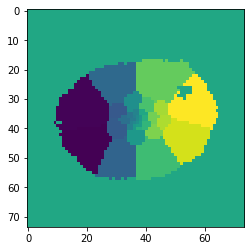

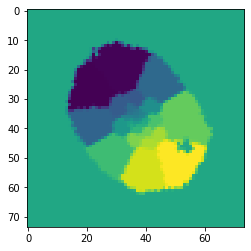

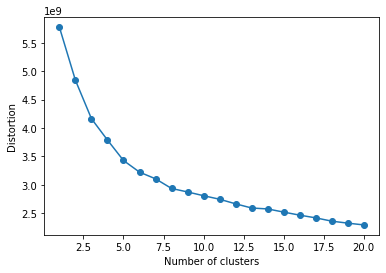

In [33]:
plt.clf()
plt.imshow(np.reshape(map_array_ml_rot_inv[0], (size, size)))
plt.show()

plt.imshow(np.reshape(map_array_ml_rot_inv[1], (size, size)))
plt.show()

# But how many clusters do you select?
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 21):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(map_array_ml_rot_inv)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 21), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
# This plot decreases quite smoothely, which makes me highly suspicious of the process

In [1]:
# Okay so maybe k-means is too simplistic, try 
# Gaussian mixture models
from sklearn.mixture import GaussianMixture as GMM
n_components = np.arange(1, 11)
models = [GMM(n, covariance_type='full', random_state=0).fit(map_array_ml)
          for n in n_components]

plt.plot(n_components, [m.bic(map_array_ml_rot_inv) for m in models], label='BIC')
plt.plot(n_components, [m.aic(map_array_ml_rot_inv) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

NameError: name 'np' is not defined

(480, 5476) (480, 199)


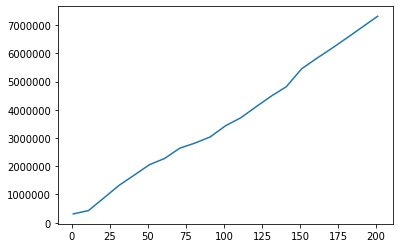

In [48]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(map_array_ml_rot_inv)
print(map_array_ml_rot_inv.shape,data.shape)
n_components = np.arange(1, 210, 10)
models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

In [55]:
gmm = GMM(110, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

data_new = gmm.sample(100)#, random_state=0)
maps_new = pca.inverse_transform(data_new)
plot_digits(maps_new)

True


ValueError: could not broadcast input array from shape (100,199) into shape (100)

True
False
False


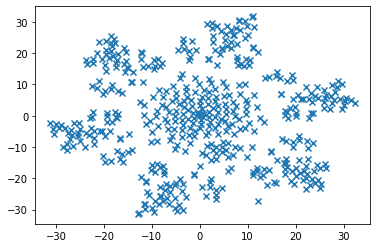

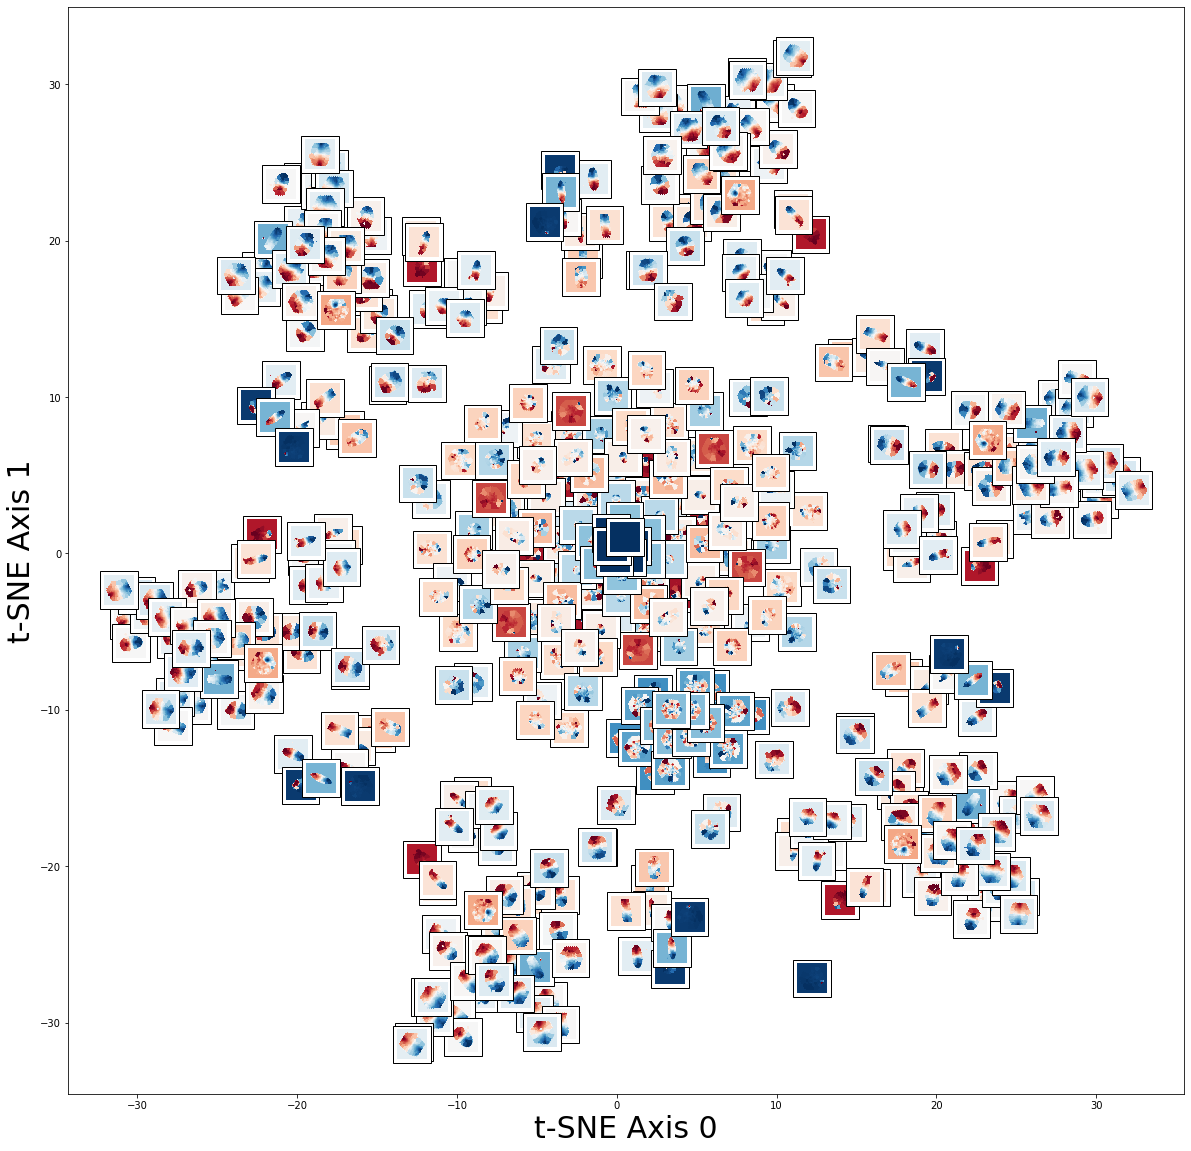

In [37]:

# Try out the same thing but pre-process with t-SNE
from sklearn.manifold import TSNE
#T-distributed Stochastic Neighbor Embedding (t-SNE)

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0, method='exact')
# t-SNE collapses everything down into 2 dimensions, which don't really have a meaning
# but it is an interesting way to visualize the data

'''masked_map_array_ml = np.ma.masked_where(np.isnan(map_array_ml), map_array_ml)
masked_map_array_ml = np.ma.masked_where(np.isinf(masked_map_array_ml), masked_map_array_ml)
for i in range(np.shape(masked_map_array_ml)[0]):
    
    for j in range(len(masked_map_array_ml[i])):
        if np.isnan(masked_map_array_ml[i][j]) or np.isinf(masked_map_array_ml[i][j]):
            print(masked_map_array_ml[i][j])'''

print(np.isfinite(map_array_ml_rot_inv).all()) # True 
print(np.isnan(map_array_ml_rot_inv).all()) # False
print(np.isinf(map_array_ml_rot_inv).all()) # False
            
map_array_ml_proj = tsne.fit_transform(map_array_ml_rot_inv)

plt.clf()
plt.scatter(map_array_ml_proj[:,0], map_array_ml_proj[:,1], marker='x')
plt.show()

# This code is from Becky Smethurst (thanks!!)

from matplotlib.offsetbox import OffsetImage, AnnotationBbox 
from matplotlib import pyplot as plt

def imscatter(x, y, images, ax=None, zoom=0.1):     
        if ax is None:         
                ax = plt.gca()           
        x, y = np.atleast_1d(x, y)     
        artists = []     
        for x0, y0, image0 in zip(x, y, images):
                ima = image0
                im = OffsetImage(ima, zoom=zoom, cmap='RdBu_r')   
                ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=True)         
                artists.append(ax.add_artist(ab))     
        ax.update_datalim(np.column_stack([x, y]))     
        ax.autoscale()     
        return artists
#np.reshape(map_array_ml[j,:],(shape,shape))
twod = np.reshape(map_array_ml_rot_inv, (np.shape(map_array_ml_rot_inv)[0],size, size))

fig = plt.figure(figsize=(20,20))
ax1 = plt.gca()
imscatter(map_array_ml_proj[:,0], map_array_ml_proj[:,1], np.ma.masked_where(twod==0, twod), ax=ax1, zoom=0.4)
ax1.set_xlabel('t-SNE Axis 0', size=30)
ax1.set_ylabel('t-SNE Axis 1', size=30)
plt.savefig('tSNE.png', dpi=1000)

74.0


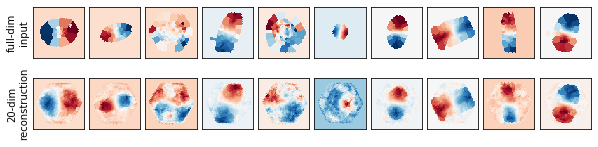

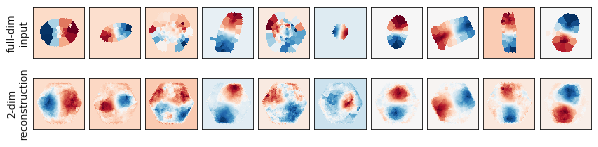

In [32]:
# Try running a PCA on the images first
from sklearn.decomposition import PCA

print(np.sqrt(np.shape(map_array_ml)[1]))
pca = PCA(20)
pca.fit(map_array_ml)
components = pca.transform(map_array_ml)
projected = pca.inverse_transform(components)
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(map_array_ml[i].reshape(74,74), cmap='RdBu_r')
    ax[1, i].imshow(projected[i].reshape(74,74), cmap='RdBu_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('20-dim\nreconstruction');


pca = PCA(15)
pca.fit(map_array_ml)
components = pca.transform(map_array_ml)
projected = pca.inverse_transform(components)
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(map_array_ml[i].reshape(74,74), cmap='RdBu_r')
    ax[1, i].imshow(projected[i].reshape(74,74), cmap='RdBu_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('2-dim\nreconstruction');

(80, 5476) (80, 5476) (80, 2)


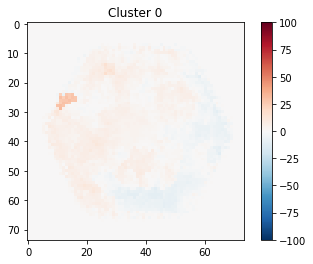

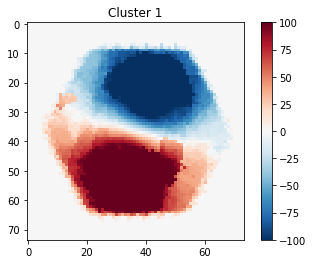

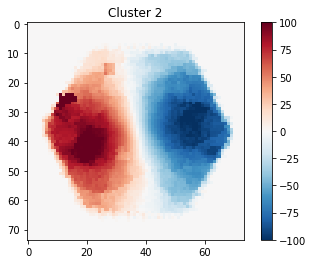

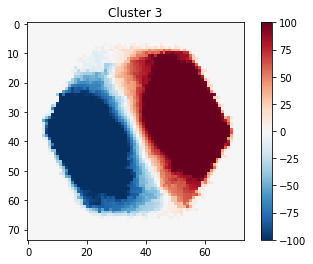

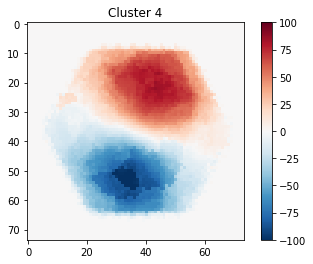

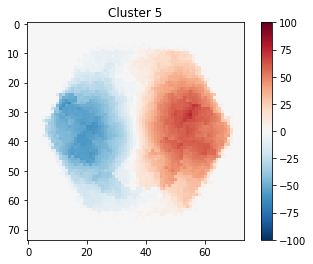

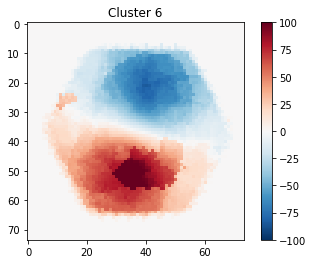

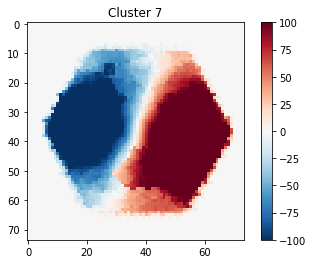

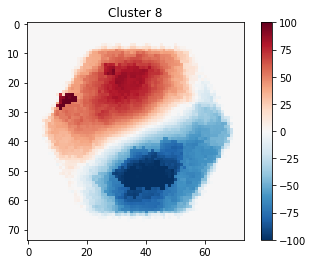

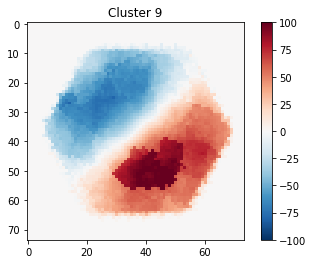

[5 0 0 4 0 0 4 2 4 1 5 1 6 2 5 0 4 6 6 0 5 0 2 8 0 1 0 0 4 4 0 5 1 5 0 5 9
 0 0 8 4 2 0 4 8 2 5 0 0 3 5 0 8 9 9 0 7 6 6 8 5 5 0 0 1 2 5 4 2 0 2 0 4 0
 0 4 6 5 0 8]


<Figure size 432x288 with 0 Axes>

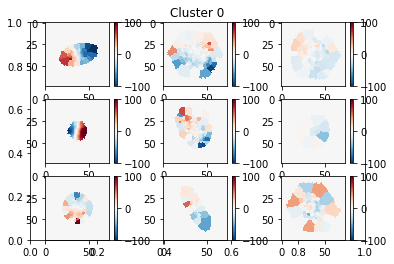

<Figure size 432x288 with 0 Axes>

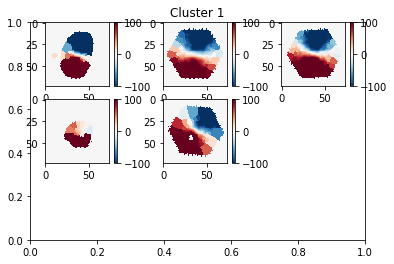

<Figure size 432x288 with 0 Axes>

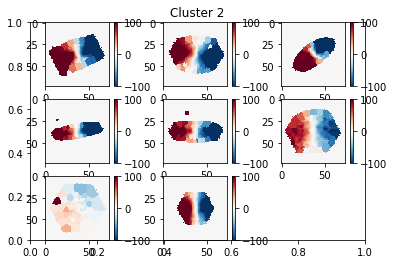

<Figure size 432x288 with 0 Axes>

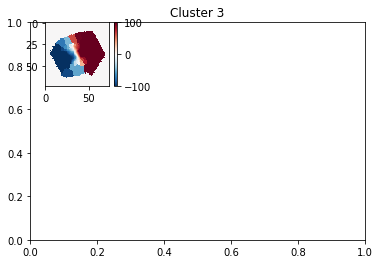

<Figure size 432x288 with 0 Axes>

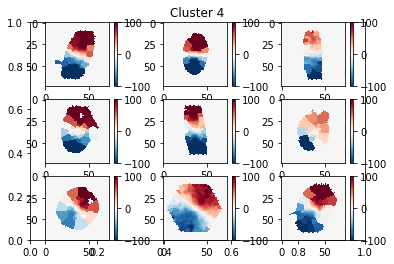

<Figure size 432x288 with 0 Axes>

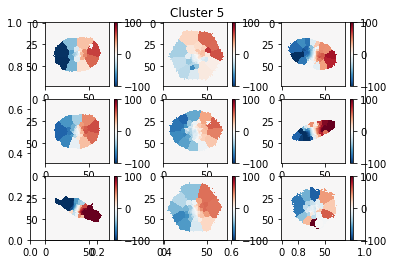

<Figure size 432x288 with 0 Axes>

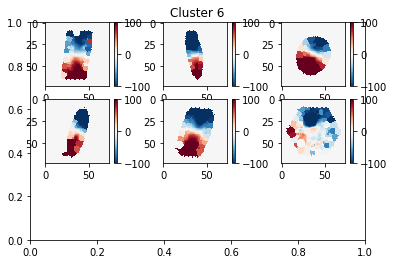

<Figure size 432x288 with 0 Axes>

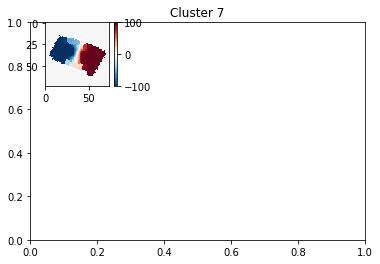

<Figure size 432x288 with 0 Axes>

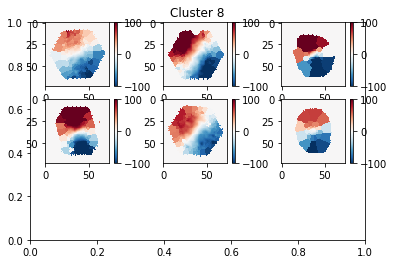

<Figure size 432x288 with 0 Axes>

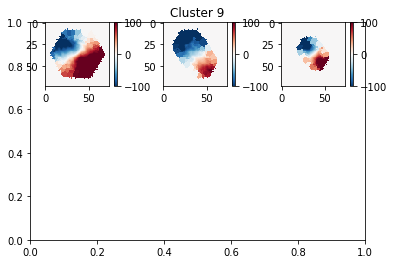

In [30]:
# Try k-means - this tutorial does the digits - https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
print(np.shape(map_array_ml), np.shape(projected), np.shape(components))

from sklearn.cluster import KMeans

# the data needs to be in shape (n_things, x*y), where x and y are the dimensions of each map
# I'm really not sure what to do if the dimensions are different
nclusters=10

kmeans = KMeans(n_clusters=nclusters, random_state=0)
clusters = kmeans.fit_predict(projected)
# the center of the cluster is the arithmetic mean of all the 
# points belonging to the cluster, each point in a cluster is closer
# to that cluster center than to any other cluster centers

# Visualizing what the heck this actually looks like

centers = kmeans.cluster_centers_.reshape(nclusters, shape, shape)


for j in range(nclusters):
    plt.clf()
    plt.imshow(centers[j], cmap='RdBu_r', vmin=-100, vmax=100)
    plt.colorbar()
    plt.title('Cluster '+str(j))
    plt.show()



# My next question is is there a way to visualize multiple maps within each class
print(clusters)
# these are the cluster IDs of each galaxy
cluster={}
#cluster_name=[]
for n in range(nclusters):
    
    cluster[n]=[]
    for j in range(data_length):
        if clusters[j]==n:
            cluster[n].append(np.reshape(map_array_ml[j,:],(shape,shape)))
    #cluster_name.append(str(cluster[n]))
nclusters_list = np.arange(0,nclusters)



# Plot multiple examples of each class
for i in range(nclusters):
    plt.clf()
    fig=plt.figure()
    #fig.subplots_adjust(hspace = .5, wspace=.001)
    plt.title('Cluster '+str(i))
    
    if np.shape(cluster[i])[0] < 9:
        for j in range(np.shape(cluster[i])[0]):
            ax = fig.add_subplot(3,3,j+1)
            im = ax.imshow(cluster[i][j], cmap='RdBu_r', vmin=-100, vmax=100)
            plt.colorbar(im)
        plt.show()
    else:
        for j in range(9):
            ax = fig.add_subplot(3,3,j+1)
            im = ax.imshow(cluster[i][j], cmap='RdBu_r', vmin=-100, vmax=100)
            plt.colorbar(im)
        plt.show()
# Interestingly, without any pre-processing, one thing k-means sorts by is the direction of the velocity gradient.
# This applies to cluster 1, 5, 6, and 8, which are all oriented differently but basically the same type of map.
# k-menas also sorts by different sorts of irregularities.
# one option is to standardize the maps and look at the outcome again (in the next cell)



In [ ]:
# This looks like it is still preserving the dipole so I'll need a way of doing this better.

In [37]:
# Try k-means - this tutorial does the digits - https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html


from sklearn.cluster import KMeans
print(np.shape(map_array_ml))

# the data needs to be in shape (n_things, x*y), where x and y are the dimensions of each map
# I'm really not sure what to do if the dimensions are different
nclusters=10

kmeans = KMeans(n_clusters=nclusters, random_state=0)
clusters = kmeans.fit_predict(map_array_ml)
# the center of the cluster is the arithmetic mean of all the 
# points belonging to the cluster, each point in a cluster is closer
# to that cluster center than to any other cluster centers


/Users/beckynevin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/beckynevin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/beckynevin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


(215, 5476)


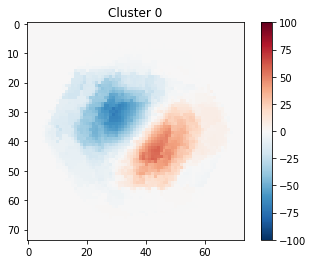

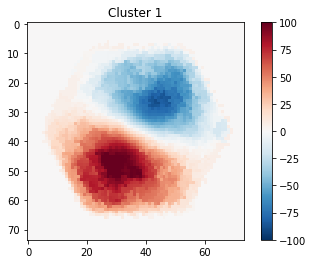

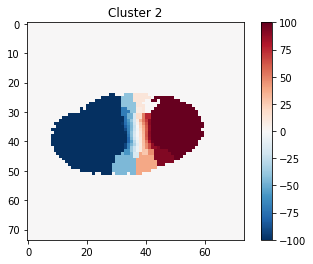

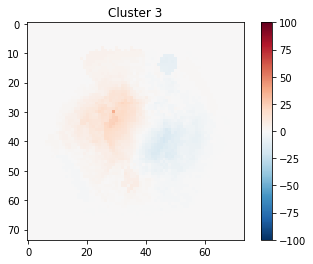

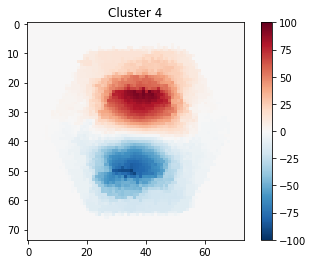

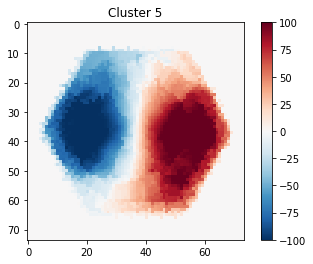

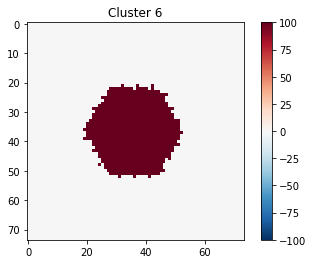

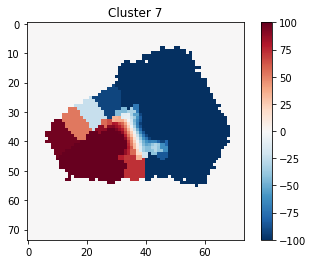

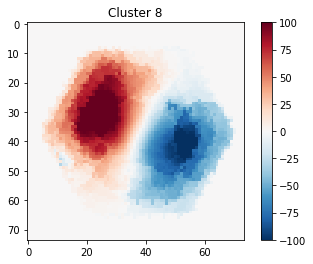

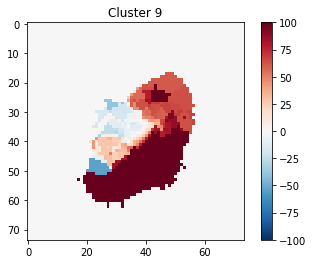

[0 1 4 4 3 0 9 3 8 0 5 0 3 0 8 0 8 3 4 3 4 5 1 0 3 1 1 8 3 0 3 1 3 3 3 0 3
 5 5 3 4 3 5 3 3 5 0 8 3 0 3 3 3 3 0 4 9 1 0 3 3 3 4 4 0 1 3 1 3 4 3 3 0 3
 0 3 9 8 8 3 0 4 3 3 6 8 0 8 3 4 4 0 0 4 5 3 8 1 4 3 0 4 0 3 3 3 1 3 3 3 0
 0 1 3 3 5 3 3 4 3 5 3 0 3 3 3 3 2 3 1 4 0 3 3 3 1 4 8 5 0 3 3 3 3 0 3 8 0
 3 3 0 3 0 4 3 8 8 4 0 0 3 8 3 3 3 4 0 3 3 3 1 5 3 1 0 1 3 0 0 7 0 3 1 3 3
 3 3 3 3 0 1 4 3 4 0 4 3 5 3 1 0 4 3 3 8 4 4 3 3 1 3 4 3 3 4]


<Figure size 432x288 with 0 Axes>

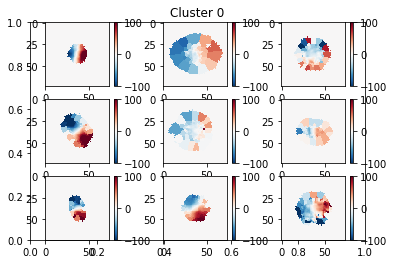

<Figure size 432x288 with 0 Axes>

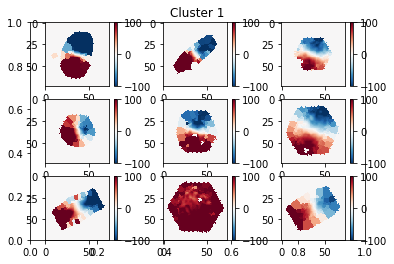

<Figure size 432x288 with 0 Axes>

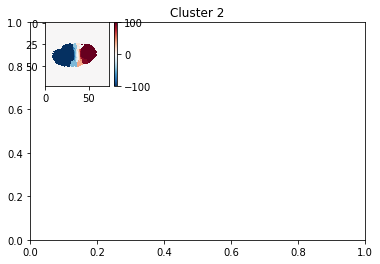

<Figure size 432x288 with 0 Axes>

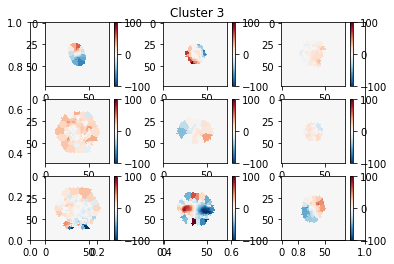

<Figure size 432x288 with 0 Axes>

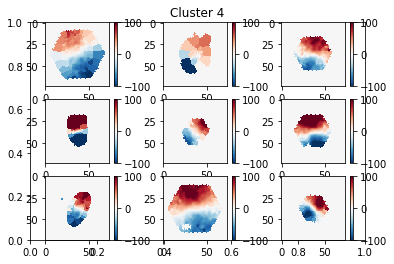

<Figure size 432x288 with 0 Axes>

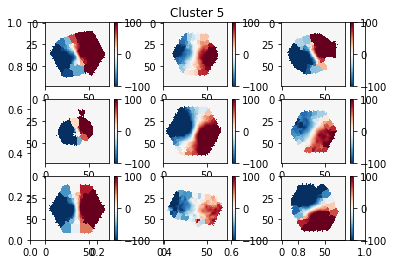

<Figure size 432x288 with 0 Axes>

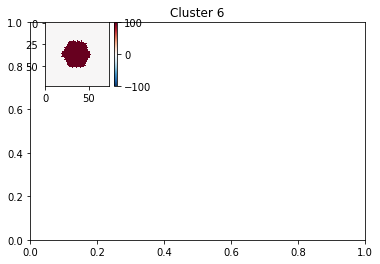

<Figure size 432x288 with 0 Axes>

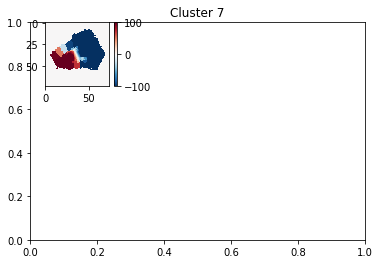

<Figure size 432x288 with 0 Axes>

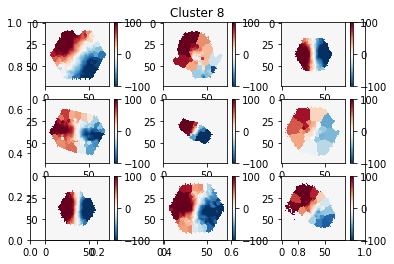

<Figure size 432x288 with 0 Axes>

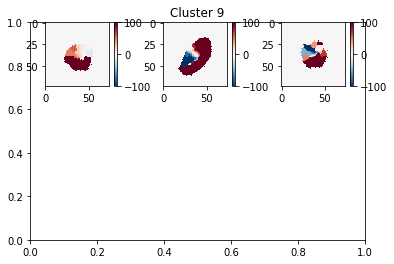

In [38]:
# Visualizing what the heck this actually looks like

centers = kmeans.cluster_centers_.reshape(nclusters, shape, shape)


for j in range(nclusters):
    plt.clf()
    plt.imshow(centers[j], cmap='RdBu_r', vmin=-100, vmax=100)
    plt.colorbar()
    plt.title('Cluster '+str(j))
    plt.show()



# My next question is is there a way to visualize multiple maps within each class
print(clusters)
# these are the cluster IDs of each galaxy
cluster={}
#cluster_name=[]
for n in range(nclusters):
    
    cluster[n]=[]
    for j in range(data_length):
        if clusters[j]==n:
            cluster[n].append(np.reshape(map_array_ml[j,:],(shape,shape)))
    #cluster_name.append(str(cluster[n]))
nclusters_list = np.arange(0,nclusters)



# Plot multiple examples of each class
for i in range(nclusters):
    plt.clf()
    fig=plt.figure()
    #fig.subplots_adjust(hspace = .5, wspace=.001)
    plt.title('Cluster '+str(i))
    
    if np.shape(cluster[i])[0] < 9:
        for j in range(np.shape(cluster[i])[0]):
            ax = fig.add_subplot(3,3,j+1)
            im = ax.imshow(cluster[i][j], cmap='RdBu_r', vmin=-100, vmax=100)
            plt.colorbar(im)
        plt.show()
    else:
        for j in range(9):
            ax = fig.add_subplot(3,3,j+1)
            im = ax.imshow(cluster[i][j], cmap='RdBu_r', vmin=-100, vmax=100)
            plt.colorbar(im)
        plt.show()
# Interestingly, without any pre-processing, one thing k-means sorts by is the direction of the velocity gradient.
# This applies to cluster 1, 5, 6, and 8, which are all oriented differently but basically the same type of map.
# k-menas also sorts by different sorts of irregularities.
# one option is to standardize the maps and look at the outcome again (in the next cell)


In [ ]:
# An interesting thing you may notice is that the clusters seem to rely 
# heavily on the direction of the velocity field.
# This seems to be the primary effect.

# To determine if the clustering is being affected by the size of the IFU
# it is important to filter out the directionality first

[9 0 6 0 6 9 6 6 8 6 1 6 2 6 2 0 4 1 0 1 2 6 6 2 9 6 6 0 7 2 8 6 6 0 6 2 2
 8 1 1 3 2 6 6 8 6 1 8 0 6 6 6 6 2 9 6 1 8 6 2 6 9 6 8 6 8 6 6 2 8 8 1 6 6
 8 2 6 2 1 6 8 6 6 9 6 6 8 6 2 6 9 6 9 6 6 1 1 2 2 6 2 8 9 2 1 6 8 6 1 9 6
 6 6 6 9 9 6 2 6 6 6 6 6 2 9 6 6 6 6 0 9 2 9 6 8 6 6 9 0 6 2 6 2 9 9 1 0 6
 0 2 6 6 5 1 6 6 6 6 0]


<Figure size 432x288 with 0 Axes>

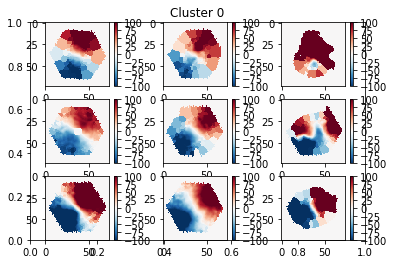

<Figure size 432x288 with 0 Axes>

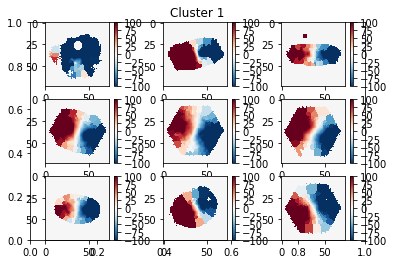

<Figure size 432x288 with 0 Axes>

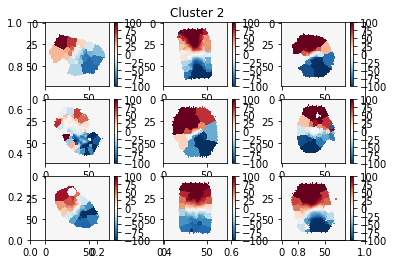

<Figure size 432x288 with 0 Axes>

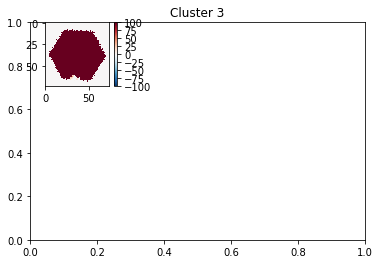

<Figure size 432x288 with 0 Axes>

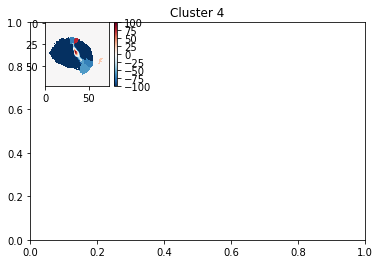

<Figure size 432x288 with 0 Axes>

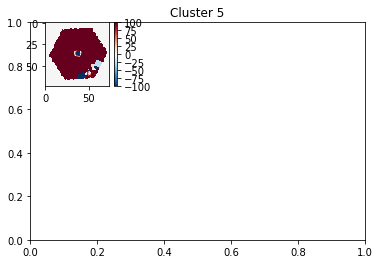

<Figure size 432x288 with 0 Axes>

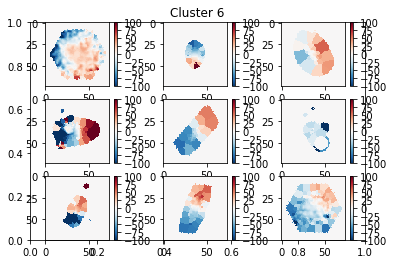

<Figure size 432x288 with 0 Axes>

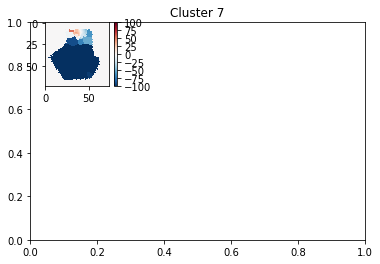

<Figure size 432x288 with 0 Axes>

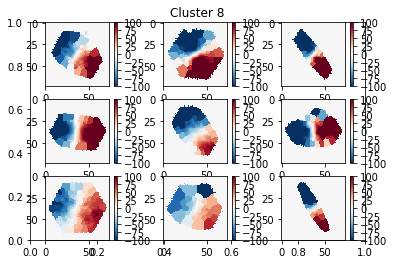

<Figure size 432x288 with 0 Axes>

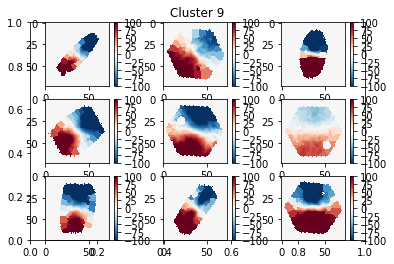

In [11]:
# Trying to first standardize the data and re-k-means it:
# It is possible to do this using an sklearn pipeline

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()

nclusters=10
kmeans = KMeans(n_clusters=nclusters, random_state=0)

pipeline = make_pipeline(scaler, kmeans)



#clusters = pipeline.fit(map_array_ml)

clusters = pipeline.fit_predict(map_array_ml)
# the center of the cluster is the arithmetic mean of all the 
# points belonging to the cluster, each point in a cluster is closer
# to that cluster center than to any other cluster centers



# My next question is is there a way to visualize multiple maps within each class
print(clusters)
# these are the cluster IDs of each galaxy
cluster={}
#cluster_name=[]
for n in range(nclusters):
    
    cluster[n]=[]
    for j in range(data_length):
        if clusters[j]==n:
            cluster[n].append(np.reshape(map_array_ml[j,:],(shape,shape)))
    #cluster_name.append(str(cluster[n]))
nclusters_list = np.arange(0,nclusters)



# Plot multiple examples of each class
for i in range(nclusters):
    plt.clf()
    fig=plt.figure()
    #fig.subplots_adjust(hspace = .5, wspace=.001)
    plt.title('Cluster '+str(i))
    
    if np.shape(cluster[i])[0] < 9:
        for j in range(np.shape(cluster[i])[0]):
            ax = fig.add_subplot(3,3,j+1)
            im = ax.imshow(cluster[i][j], cmap='RdBu_r', vmin=-100, vmax=100)
            plt.colorbar(im)
        plt.show()
    else:
        for j in range(9):
            ax = fig.add_subplot(3,3,j+1)
            im = ax.imshow(cluster[i][j], cmap='RdBu_r', vmin=-100, vmax=100)
            plt.colorbar(im)
        plt.show()

True
False
False


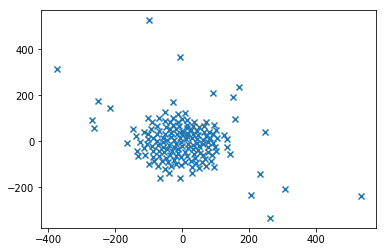

In [14]:
# Try out the same thing but pre-process with t-SNE
from sklearn.manifold import TSNE
#T-distributed Stochastic Neighbor Embedding (t-SNE)

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0, method='exact')
# t-SNE collapses everything down into 2 dimensions, which don't really have a meaning
# but it is an interesting way to visualize the data

'''masked_map_array_ml = np.ma.masked_where(np.isnan(map_array_ml), map_array_ml)
masked_map_array_ml = np.ma.masked_where(np.isinf(masked_map_array_ml), masked_map_array_ml)
for i in range(np.shape(masked_map_array_ml)[0]):
    
    for j in range(len(masked_map_array_ml[i])):
        if np.isnan(masked_map_array_ml[i][j]) or np.isinf(masked_map_array_ml[i][j]):
            print(masked_map_array_ml[i][j])'''

print(np.isfinite(map_array_ml).all()) # True 
print(np.isnan(map_array_ml).all()) # False
print(np.isinf(map_array_ml).all()) # False
            
map_array_ml_proj = tsne.fit_transform(map_array_ml)

plt.clf()
plt.scatter(map_array_ml_proj[:,0], map_array_ml_proj[:,1], marker='x')
plt.show()

# I am not sure if this is going to help at this point, unless I can plot the individual points
# as velocity maps...



[-- -- -- ... -- -- --]


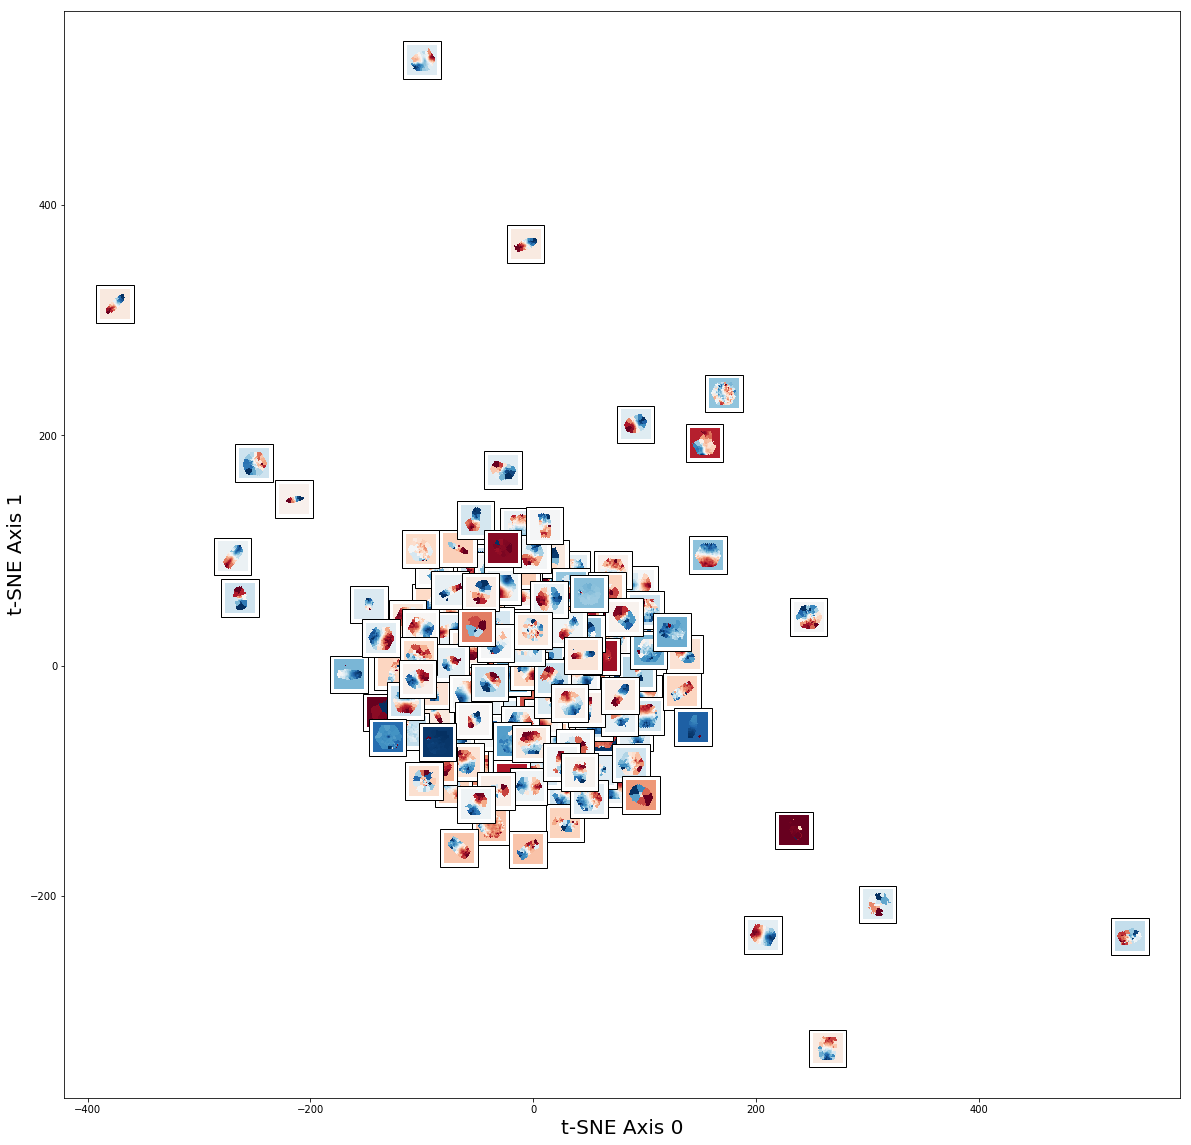

In [37]:
# This code is from Becky Smethurst (thanks!!)

from matplotlib.offsetbox import OffsetImage, AnnotationBbox 
from matplotlib import pyplot as plt

def imscatter(x, y, images, ax=None, zoom=0.1):     
        if ax is None:         
                ax = plt.gca()           
        x, y = np.atleast_1d(x, y)     
        artists = []     
        for x0, y0, image0 in zip(x, y, images):
                ima = image0
                im = OffsetImage(ima, zoom=zoom, cmap='RdBu_r')   
                ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=True)         
                artists.append(ax.add_artist(ab))     
        ax.update_datalim(np.column_stack([x, y]))     
        ax.autoscale()     
        return artists
#np.reshape(map_array_ml[j,:],(shape,shape))
map_array_ml_mask = np.ma.masked_where(map_array_ml==0., map_array_ml)
print(map_array_ml_mask[0])
twod = np.reshape(map_array_ml_mask, (np.shape(map_array_ml)[0],shape,shape))

fig = plt.figure(figsize=(20,20))
ax1 = plt.gca()
imscatter(map_array_ml_proj[:,0], map_array_ml_proj[:,1], np.ma.masked_where(twod==0, twod), ax=ax1, zoom=0.4)
ax1.set_xlabel('t-SNE Axis 0', size=20)
ax1.set_ylabel('t-SNE Axis 1', size=20)
plt.show()

(10, 2)


TypeError: Invalid dimensions for image data

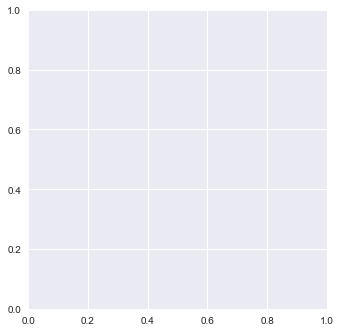

In [74]:
nclusters=10

kmeans = KMeans(n_clusters=nclusters, random_state=0)
clusters = kmeans.fit_predict(map_array_ml_proj)
# the center of the cluster is the arithmetic mean of all the 
# points belonging to the cluster, each point in a cluster is closer
# to that cluster center than to any other cluster centers
print(kmeans.cluster_centers_.shape)

# Visualizing what the heck this actually looks like



centers = kmeans.cluster_centers_#.reshape(nclusters, shape, shape)


for j in range(nclusters):
    plt.clf()
    plt.imshow(centers[j], cmap='RdBu_r', vmin=-100, vmax=100)
    plt.colorbar()
    plt.title('Cluster '+str(j))
    plt.show()



# My next question is is there a way to visualize multiple maps within each class
print(clusters)
# these are the cluster IDs of each galaxy
cluster={}
#cluster_name=[]
for n in range(nclusters):
    
    cluster[n]=[]
    for j in range(data_length):
        if clusters[j]==n:
            cluster[n].append(np.reshape(map_array_ml[j,:],(shape,shape)))
    #cluster_name.append(str(cluster[n]))
nclusters_list = np.arange(0,nclusters)



# Plot multiple examples of each class
for i in range(nclusters):
    plt.clf()
    fig=plt.figure()
    #fig.subplots_adjust(hspace = .5, wspace=.001)
    plt.title('Cluster '+str(i))
    
    if np.shape(cluster[i])[0] < 9:
        for j in range(np.shape(cluster[i])[0]):
            ax = fig.add_subplot(3,3,j+1)
            im = ax.imshow(cluster[i][j], cmap='RdBu_r', vmin=-100, vmax=100)
            plt.colorbar(im)
        plt.show()
    else:
        for j in range(9):
            ax = fig.add_subplot(3,3,j+1)
            im = ax.imshow(cluster[i][j], cmap='RdBu_r', vmin=-100, vmax=100)
            plt.colorbar(im)
        plt.show()



In [ ]:
import time as time
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
###############################################################################
# Define the structure A of the data. Pixels connected to their neighbors.
connectivity = grid_to_graph(*map_array_ml.shape)

###############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 15  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters,
        linkage='ward', connectivity=connectivity).fit(map_array_ml)

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


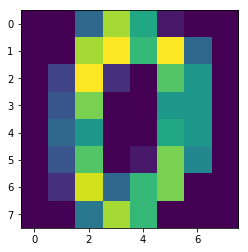

4 <class 'int'>
(4, 64)


TypeError: only size-1 arrays can be converted to Python scalars

In [40]:
#trying out k-means on the digits dataset
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
print(np.reshape(digits.data[0],(8,8)))
plt.imshow(np.reshape(digits.data[0],(8,8)))
plt.show()


clusters=4
print(clusters, type(int(clusters/2)))
kmeans = KMeans(n_clusters=clusters, random_state=0)
clusters = kmeans.fit_predict(digits.data)
print(kmeans.cluster_centers_.shape)

fig, ax = plt.subplots(2, int(clusters/2), figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(clusters, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.show()

In [41]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)


0.3639398998330551

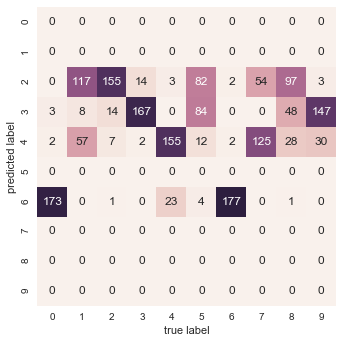

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set() 
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [43]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.11129660545353366

In [35]:
# How to do batch downloading

import os
print(os.environ['SAS_BASE_DIR'])

print(os.getcwd())

STOP
from marvin.utils.general import get_drpall_table
data = get_drpall_table()

import numpy as np
primary        = data['mngtarg1'] & 2**10
secondary      = data['mngtarg1'] & 2**11
color_enhanced = data['mngtarg1'] & 2**12

main_sample = np.logical_or.reduce((primary, secondary, color_enhanced))

plateifus = data['plateifu'][main_sample]
print(plateifus)
STOP

from marvin.utils.general.general import downloadList
downloadList(plateifus, dltype='map')

/Volumes/My\ Book/sas
/Users/beckynevin/Documents/Backup_My_Book/My_Passport_backup/Kinematic_ML


NameError: name 'STOP' is not defined

In [36]:
from marvin.tools import Cube

cc = Cube(plateifu='9002-12701', mode='remote')

cc

cc.download()

There is no file with filetype='mangacube' to access in the tree module loaded


AccessError: No files to download.